**Instituto Tecnológico de Aeronáutica – ITA**

**Inteligência Artificial para Robótica Móvel – CT-213**

**Professores:** 

Marcos Ricardo Omena de Albuquerque Maximo

André Oliveira Françani


# Laboratório 7 – *Imitation Learning* com Keras

# 1.	Introdução
 
Nesse laboratório, seu objetivo é copiar um movimento de caminhar de um robô humanoide usando uma técnica chamada imitation learning. Para isso, você usará o framework de Deep Learning Keras. A Figura 1 mostra uma comparação entre o movimento da junta do quadril de arfagem obtida através de “observação” da caminhada de um robô humanoide e o mesmo movimento conforme “copiado” por uma rede neural.


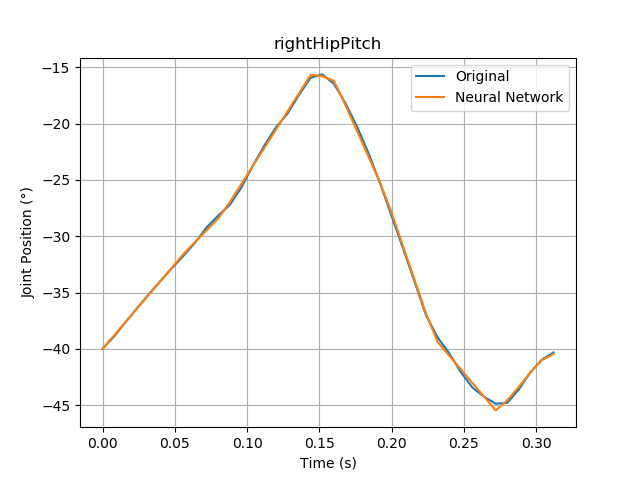

**Figura 1**: imitação do movimento da junta do quadril de arfagem através de uma rede neural.


# 2. Descrição do Problema

O problema a ser resolvido nesse laboratório é copiar o movimento de caminhar de um robô humanoide usando uma técnica chamada *imitation learning*. Nessa técnica, copia-se uma política de controle usando aprendizado supervisionado. Para a implementação da rede neural, você utilizará o *framework* Keras, que facilita o uso do *framework* Tensorflow.

O exemplo de treinamento consiste nas posições angulares das 20 juntas do robô durante um ciclo de caminhada, que foram obtidas através da “observação” das juntas do robô enquanto ele caminhava. O algoritmo de caminhada original é baseado em teoria de Controle. A entrada da rede é o tempo dentro do ciclo de caminhada (apenas 1 entrada), enquanto a saída consiste nas posições das 20 juntas. Sugere-se que a rede a ser implementada deve seguir a arquitetura apresentada na Tabela 1.


| **Layer** | **Neurons** | **Activation Function** |
|--------------|------------------|------------------------------|
| *Dense*        | 75               | *Leaky* ReLU ($\alpha=0.01$)   |
| *Dense*        | 50               | *Leaky* ReLU ($\alpha=0.01$)   |
| *Dense*        | 20               | *Linear*                       |

<p align="center">
<b>Tabela 1</b>: arquitetura da rede neural usada para o <i>imitation learning</i>. </p>


# 3.	Código Base

O código base já implementa um exemplo para familiarização com o Keras. Então, você deve implementar a rede neural usada para o *imitation learning* seguindo mais ou menos as mesmas ideias (há dicas no final do roteiro para te ajudar caso ainda tenha dificuldades).


# 4. Tarefas

Comece rodando a célula abaixo para fazer o *download* da base de dados e do arquivo utils.py com funções utilitárias.

In [42]:
import zipfile
import os

# download data (MUST RUN)
!gdown --id 1RUdMNaioXsOhTw9nO5Mdju6wxzODytcu

with zipfile.ZipFile("lab7_ct213_2022.zip","r") as zip_ref:
  zip_ref.extractall() # extracts in current directory

# make results folder to save images
if not os.path.exists('results'):
  os.makedirs('results')
  
os.remove("lab7_ct213_2022.zip")

C:\Users\vinic\anaconda3\envs\ct213\lib\site-packages\gdown\cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RUdMNaioXsOhTw9nO5Mdju6wxzODytcu
To: C:\Users\vinic\OneDrive\Documentos\CT-213\LAB7\lab7_ct213_2022.zip

  0%|          | 0.00/12.7k [00:00<?, ?B/s]
100%|##########| 12.7k/12.7k [00:00<00:00, 12.7MB/s]


## 4.1. Estudo de Implementação de Rede Neural com Keras

Primeiramente, estude a implementação na célula abaixo para aprender como implementar uma rede neural com Keras. Sim, o Keras é muito fácil de usar! Isso que fez essa *framework* ser tão popular.

## 4.2. Análise do Efeito de Regularização

Na mesma célula abaixo, a variável ``lambda_l2`` representa o parâmetro $\lambda$ da regularização $L_2$. Treine as redes para as duas funções de classificação diferentes (*sum_gt_zero* e *xor*) e considerando $\lambda=0$ (sem regularização) e $\lambda=0.002$. Compare os resultados obtidos e discuta o efeito da regularização. Coloque os gráficos gerados no seu relatório.

Epoch 1/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.6751 - binary_accuracy: 0.6350
Epoch 2/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.6483 - binary_accuracy: 0.7150
Epoch 3/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.6221 - binary_accuracy: 0.7750
Epoch 4/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.5993 - binary_accuracy: 0.8150
Epoch 5/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.5768 - binary_accuracy: 0.8500
Epoch 6/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.5553 - binary_accuracy: 0.8650
Epoch 7/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.5365 - binary_accuracy: 0.8950
Epoch 8/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.5176 - binary_accuracy: 0.9100
Epoch 9/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.5013 - binary_accuracy: 0.9100
Epoch 10/5000
4/4 [==============================] - 0s

4/4 [==============================] - 0s 2ms/step - loss: 0.2118 - binary_accuracy: 0.9300
Epoch 78/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2109 - binary_accuracy: 0.9300
Epoch 79/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2102 - binary_accuracy: 0.9300
Epoch 80/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2095 - binary_accuracy: 0.9300
Epoch 81/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2089 - binary_accuracy: 0.9300
Epoch 82/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2083 - binary_accuracy: 0.9300
Epoch 83/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2077 - binary_accuracy: 0.9300
Epoch 84/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2071 - binary_accuracy: 0.9300
Epoch 85/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.2066 - binary_accuracy: 0.9300
Epoch 86/5000
4/4 [==============================] - 0s 1ms/

4/4 [==============================] - 0s 2ms/step - loss: 0.1914 - binary_accuracy: 0.9350
Epoch 154/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1914 - binary_accuracy: 0.9350
Epoch 155/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1912 - binary_accuracy: 0.9350
Epoch 156/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1911 - binary_accuracy: 0.9350
Epoch 157/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1910 - binary_accuracy: 0.9350
Epoch 158/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1912 - binary_accuracy: 0.9350
Epoch 159/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1909 - binary_accuracy: 0.9350
Epoch 160/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1909 - binary_accuracy: 0.9350
Epoch 161/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1909 - binary_accuracy: 0.9350
Epoch 162/5000
4/4 [==============================] 

4/4 [==============================] - 0s 2ms/step - loss: 0.1884 - binary_accuracy: 0.9350
Epoch 230/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1882 - binary_accuracy: 0.9350
Epoch 231/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1882 - binary_accuracy: 0.9350
Epoch 232/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1883 - binary_accuracy: 0.9350
Epoch 233/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1882 - binary_accuracy: 0.9350
Epoch 234/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1881 - binary_accuracy: 0.9350
Epoch 235/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1882 - binary_accuracy: 0.9350
Epoch 236/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1881 - binary_accuracy: 0.9350
Epoch 237/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1881 - binary_accuracy: 0.9350
Epoch 238/5000
4/4 [==============================] 

4/4 [==============================] - 0s 1ms/step - loss: 0.1871 - binary_accuracy: 0.9350
Epoch 306/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1868 - binary_accuracy: 0.9350
Epoch 307/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1869 - binary_accuracy: 0.9350
Epoch 308/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1868 - binary_accuracy: 0.9350
Epoch 309/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1868 - binary_accuracy: 0.9350
Epoch 310/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1868 - binary_accuracy: 0.9350
Epoch 311/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1868 - binary_accuracy: 0.9350
Epoch 312/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1867 - binary_accuracy: 0.9350
Epoch 313/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1868 - binary_accuracy: 0.9350
Epoch 314/5000
4/4 [==============================] 

4/4 [==============================] - 0s 2ms/step - loss: 0.1861 - binary_accuracy: 0.9350
Epoch 382/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1860 - binary_accuracy: 0.9350
Epoch 383/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1860 - binary_accuracy: 0.9350
Epoch 384/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1859 - binary_accuracy: 0.9350
Epoch 385/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1859 - binary_accuracy: 0.9350
Epoch 386/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1860 - binary_accuracy: 0.9350
Epoch 387/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1862 - binary_accuracy: 0.9350
Epoch 388/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1859 - binary_accuracy: 0.9350
Epoch 389/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1859 - binary_accuracy: 0.9350
Epoch 390/5000
4/4 [==============================] 

4/4 [==============================] - 0s 1ms/step - loss: 0.1854 - binary_accuracy: 0.9300
Epoch 458/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1854 - binary_accuracy: 0.9300
Epoch 459/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1853 - binary_accuracy: 0.9350
Epoch 460/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1853 - binary_accuracy: 0.9350
Epoch 461/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1853 - binary_accuracy: 0.9350
Epoch 462/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1852 - binary_accuracy: 0.9300
Epoch 463/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1854 - binary_accuracy: 0.9300
Epoch 464/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1852 - binary_accuracy: 0.9300
Epoch 465/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1853 - binary_accuracy: 0.9300
Epoch 466/5000
4/4 [==============================] 

4/4 [==============================] - 0s 2ms/step - loss: 0.1847 - binary_accuracy: 0.9300
Epoch 534/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1847 - binary_accuracy: 0.9300
Epoch 535/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1847 - binary_accuracy: 0.9300
Epoch 536/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1848 - binary_accuracy: 0.9300
Epoch 537/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1847 - binary_accuracy: 0.9300
Epoch 538/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1847 - binary_accuracy: 0.9300
Epoch 539/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1846 - binary_accuracy: 0.9300
Epoch 540/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1847 - binary_accuracy: 0.9300
Epoch 541/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1847 - binary_accuracy: 0.9300
Epoch 542/5000
4/4 [==============================] 

4/4 [==============================] - 0s 1ms/step - loss: 0.1842 - binary_accuracy: 0.9300
Epoch 610/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1842 - binary_accuracy: 0.9300
Epoch 611/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1842 - binary_accuracy: 0.9300
Epoch 612/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1842 - binary_accuracy: 0.9300
Epoch 613/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1842 - binary_accuracy: 0.9300
Epoch 614/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1841 - binary_accuracy: 0.9300
Epoch 615/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1843 - binary_accuracy: 0.9300
Epoch 616/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1842 - binary_accuracy: 0.9300
Epoch 617/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1842 - binary_accuracy: 0.9300
Epoch 618/5000
4/4 [==============================] 

4/4 [==============================] - 0s 2ms/step - loss: 0.1837 - binary_accuracy: 0.9300
Epoch 686/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1839 - binary_accuracy: 0.9300
Epoch 687/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1837 - binary_accuracy: 0.9300
Epoch 688/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1837 - binary_accuracy: 0.9300
Epoch 689/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1838 - binary_accuracy: 0.9300
Epoch 690/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1837 - binary_accuracy: 0.9300
Epoch 691/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1837 - binary_accuracy: 0.9300
Epoch 692/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1837 - binary_accuracy: 0.9300
Epoch 693/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1837 - binary_accuracy: 0.9300
Epoch 694/5000
4/4 [==============================] 

4/4 [==============================] - 0s 1ms/step - loss: 0.1833 - binary_accuracy: 0.9300
Epoch 762/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1832 - binary_accuracy: 0.9300
Epoch 763/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1833 - binary_accuracy: 0.9300
Epoch 764/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1833 - binary_accuracy: 0.9300
Epoch 765/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1833 - binary_accuracy: 0.9300
Epoch 766/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1833 - binary_accuracy: 0.9300
Epoch 767/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1834 - binary_accuracy: 0.9300
Epoch 768/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1834 - binary_accuracy: 0.9300
Epoch 769/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1834 - binary_accuracy: 0.9300
Epoch 770/5000
4/4 [==============================] 

4/4 [==============================] - 0s 1ms/step - loss: 0.1829 - binary_accuracy: 0.9300
Epoch 838/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1830 - binary_accuracy: 0.9300
Epoch 839/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1829 - binary_accuracy: 0.9300
Epoch 840/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1829 - binary_accuracy: 0.9300
Epoch 841/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1830 - binary_accuracy: 0.9300
Epoch 842/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1829 - binary_accuracy: 0.9300
Epoch 843/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1834 - binary_accuracy: 0.9300
Epoch 844/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1830 - binary_accuracy: 0.9300
Epoch 845/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1828 - binary_accuracy: 0.9300
Epoch 846/5000
4/4 [==============================] 

4/4 [==============================] - 0s 2ms/step - loss: 0.1827 - binary_accuracy: 0.9300
Epoch 914/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1826 - binary_accuracy: 0.9300
Epoch 915/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1824 - binary_accuracy: 0.9300
Epoch 916/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1824 - binary_accuracy: 0.9300
Epoch 917/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1825 - binary_accuracy: 0.9300
Epoch 918/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1825 - binary_accuracy: 0.9300
Epoch 919/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1824 - binary_accuracy: 0.9300
Epoch 920/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1826 - binary_accuracy: 0.9300
Epoch 921/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1825 - binary_accuracy: 0.9300
Epoch 922/5000
4/4 [==============================] 

4/4 [==============================] - 0s 2ms/step - loss: 0.1821 - binary_accuracy: 0.9300
Epoch 990/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1821 - binary_accuracy: 0.9300
Epoch 991/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1821 - binary_accuracy: 0.9300
Epoch 992/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1822 - binary_accuracy: 0.9300
Epoch 993/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1822 - binary_accuracy: 0.9300
Epoch 994/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1822 - binary_accuracy: 0.9300
Epoch 995/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1820 - binary_accuracy: 0.9300
Epoch 996/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1821 - binary_accuracy: 0.9300
Epoch 997/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1822 - binary_accuracy: 0.9300
Epoch 998/5000
4/4 [==============================] 

4/4 [==============================] - 0s 2ms/step - loss: 0.1819 - binary_accuracy: 0.9300
Epoch 1066/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1819 - binary_accuracy: 0.9300
Epoch 1067/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1818 - binary_accuracy: 0.9300
Epoch 1068/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1818 - binary_accuracy: 0.9300
Epoch 1069/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1818 - binary_accuracy: 0.9300
Epoch 1070/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1819 - binary_accuracy: 0.9300
Epoch 1071/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1819 - binary_accuracy: 0.9300
Epoch 1072/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1817 - binary_accuracy: 0.9300
Epoch 1073/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1817 - binary_accuracy: 0.9300
Epoch 1074/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1815 - binary_accuracy: 0.9300
Epoch 1142/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1816 - binary_accuracy: 0.9300
Epoch 1143/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1817 - binary_accuracy: 0.9300
Epoch 1144/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1814 - binary_accuracy: 0.9300
Epoch 1145/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1815 - binary_accuracy: 0.9300
Epoch 1146/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1815 - binary_accuracy: 0.9300
Epoch 1147/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1815 - binary_accuracy: 0.9300
Epoch 1148/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1817 - binary_accuracy: 0.9300
Epoch 1149/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1816 - binary_accuracy: 0.9300
Epoch 1150/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1817 - binary_accuracy: 0.9300
Epoch 1218/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1813 - binary_accuracy: 0.9300
Epoch 1219/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1814 - binary_accuracy: 0.9300
Epoch 1220/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1813 - binary_accuracy: 0.9300
Epoch 1221/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1813 - binary_accuracy: 0.9300
Epoch 1222/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1814 - binary_accuracy: 0.9300
Epoch 1223/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1812 - binary_accuracy: 0.9300
Epoch 1224/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1813 - binary_accuracy: 0.9300
Epoch 1225/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1812 - binary_accuracy: 0.9300
Epoch 1226/5000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.1810 - binary_accuracy: 0.9300
Epoch 1294/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1812 - binary_accuracy: 0.9300
Epoch 1295/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1810 - binary_accuracy: 0.9300
Epoch 1296/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1811 - binary_accuracy: 0.9300
Epoch 1297/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1812 - binary_accuracy: 0.9300
Epoch 1298/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1811 - binary_accuracy: 0.9300
Epoch 1299/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1811 - binary_accuracy: 0.9300
Epoch 1300/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1812 - binary_accuracy: 0.9300
Epoch 1301/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1813 - binary_accuracy: 0.9300
Epoch 1302/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1808 - binary_accuracy: 0.9300
Epoch 1370/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1809 - binary_accuracy: 0.9300
Epoch 1371/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1808 - binary_accuracy: 0.9300
Epoch 1372/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1809 - binary_accuracy: 0.9300
Epoch 1373/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1808 - binary_accuracy: 0.9300
Epoch 1374/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1809 - binary_accuracy: 0.9300
Epoch 1375/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1810 - binary_accuracy: 0.9300
Epoch 1376/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1808 - binary_accuracy: 0.9300
Epoch 1377/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1808 - binary_accuracy: 0.9300
Epoch 1378/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1809 - binary_accuracy: 0.9300
Epoch 1446/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1806 - binary_accuracy: 0.9300
Epoch 1447/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1808 - binary_accuracy: 0.9300
Epoch 1448/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1807 - binary_accuracy: 0.9300
Epoch 1449/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1808 - binary_accuracy: 0.9300
Epoch 1450/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1806 - binary_accuracy: 0.9300
Epoch 1451/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1806 - binary_accuracy: 0.9300
Epoch 1452/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1807 - binary_accuracy: 0.9300
Epoch 1453/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1807 - binary_accuracy: 0.9300
Epoch 1454/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1805 - binary_accuracy: 0.9300
Epoch 1522/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1805 - binary_accuracy: 0.9300
Epoch 1523/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1810 - binary_accuracy: 0.9300
Epoch 1524/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1806 - binary_accuracy: 0.9300
Epoch 1525/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1806 - binary_accuracy: 0.9300
Epoch 1526/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1805 - binary_accuracy: 0.9300
Epoch 1527/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1805 - binary_accuracy: 0.9300
Epoch 1528/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1805 - binary_accuracy: 0.9300
Epoch 1529/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1805 - binary_accuracy: 0.9300
Epoch 1530/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1804 - binary_accuracy: 0.9300
Epoch 1598/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1804 - binary_accuracy: 0.9300
Epoch 1599/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1804 - binary_accuracy: 0.9300
Epoch 1600/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1804 - binary_accuracy: 0.9300
Epoch 1601/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1804 - binary_accuracy: 0.9300
Epoch 1602/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1803 - binary_accuracy: 0.9300
Epoch 1603/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1806 - binary_accuracy: 0.9300
Epoch 1604/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1804 - binary_accuracy: 0.9300
Epoch 1605/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1804 - binary_accuracy: 0.9300
Epoch 1606/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1803 - binary_accuracy: 0.9300
Epoch 1674/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1802 - binary_accuracy: 0.9300
Epoch 1675/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1804 - binary_accuracy: 0.9300
Epoch 1676/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1804 - binary_accuracy: 0.9300
Epoch 1677/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1802 - binary_accuracy: 0.9300
Epoch 1678/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1803 - binary_accuracy: 0.9300
Epoch 1679/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1803 - binary_accuracy: 0.9300
Epoch 1680/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1803 - binary_accuracy: 0.9300
Epoch 1681/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1804 - binary_accuracy: 0.9300
Epoch 1682/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1802 - binary_accuracy: 0.9300
Epoch 1750/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1803 - binary_accuracy: 0.9300
Epoch 1751/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1801 - binary_accuracy: 0.9300
Epoch 1752/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1801 - binary_accuracy: 0.9300
Epoch 1753/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1801 - binary_accuracy: 0.9300
Epoch 1754/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1804 - binary_accuracy: 0.9300
Epoch 1755/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1801 - binary_accuracy: 0.9300
Epoch 1756/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1802 - binary_accuracy: 0.9300
Epoch 1757/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1802 - binary_accuracy: 0.9300
Epoch 1758/5000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.1801 - binary_accuracy: 0.9300
Epoch 1826/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1800 - binary_accuracy: 0.9300
Epoch 1827/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1801 - binary_accuracy: 0.9300
Epoch 1828/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1801 - binary_accuracy: 0.9300
Epoch 1829/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1803 - binary_accuracy: 0.9350
Epoch 1830/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1802 - binary_accuracy: 0.9300
Epoch 1831/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1802 - binary_accuracy: 0.9300
Epoch 1832/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1801 - binary_accuracy: 0.9350
Epoch 1833/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1800 - binary_accuracy: 0.9350
Epoch 1834/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1800 - binary_accuracy: 0.9350
Epoch 1902/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1799 - binary_accuracy: 0.9350
Epoch 1903/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1800 - binary_accuracy: 0.9350
Epoch 1904/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1799 - binary_accuracy: 0.9350
Epoch 1905/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1803 - binary_accuracy: 0.9350
Epoch 1906/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1801 - binary_accuracy: 0.9300
Epoch 1907/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1800 - binary_accuracy: 0.9300
Epoch 1908/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1800 - binary_accuracy: 0.9300
Epoch 1909/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1802 - binary_accuracy: 0.9300
Epoch 1910/5000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.1799 - binary_accuracy: 0.9350
Epoch 1978/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1800 - binary_accuracy: 0.9350
Epoch 1979/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1800 - binary_accuracy: 0.9350
Epoch 1980/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1800 - binary_accuracy: 0.9350
Epoch 1981/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1800 - binary_accuracy: 0.9350
Epoch 1982/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1798 - binary_accuracy: 0.9350
Epoch 1983/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1799 - binary_accuracy: 0.9350
Epoch 1984/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1799 - binary_accuracy: 0.9350
Epoch 1985/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1799 - binary_accuracy: 0.9350
Epoch 1986/5000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.1799 - binary_accuracy: 0.9350
Epoch 2054/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1799 - binary_accuracy: 0.9350
Epoch 2055/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1798 - binary_accuracy: 0.9350
Epoch 2056/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1801 - binary_accuracy: 0.9350
Epoch 2057/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1799 - binary_accuracy: 0.9350
Epoch 2058/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1801 - binary_accuracy: 0.9350
Epoch 2059/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1798 - binary_accuracy: 0.9350
Epoch 2060/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1798 - binary_accuracy: 0.9350
Epoch 2061/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1801 - binary_accuracy: 0.9350
Epoch 2062/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1798 - binary_accuracy: 0.9350
Epoch 2130/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1798 - binary_accuracy: 0.9400
Epoch 2131/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1798 - binary_accuracy: 0.9400
Epoch 2132/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1798 - binary_accuracy: 0.9400
Epoch 2133/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1798 - binary_accuracy: 0.9400
Epoch 2134/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1799 - binary_accuracy: 0.9400
Epoch 2135/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1798 - binary_accuracy: 0.9400
Epoch 2136/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1799 - binary_accuracy: 0.9350
Epoch 2137/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1797 - binary_accuracy: 0.9350
Epoch 2138/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2206/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2207/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1798 - binary_accuracy: 0.9350
Epoch 2208/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9350
Epoch 2209/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1798 - binary_accuracy: 0.9350
Epoch 2210/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1798 - binary_accuracy: 0.9350
Epoch 2211/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1797 - binary_accuracy: 0.9350
Epoch 2212/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1797 - binary_accuracy: 0.9350
Epoch 2213/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2214/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2282/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2283/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2284/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2285/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1800 - binary_accuracy: 0.9400
Epoch 2286/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1798 - binary_accuracy: 0.9400
Epoch 2287/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1798 - binary_accuracy: 0.9400
Epoch 2288/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2289/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2290/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1798 - binary_accuracy: 0.9400
Epoch 2358/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2359/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1799 - binary_accuracy: 0.9400
Epoch 2360/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2361/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1799 - binary_accuracy: 0.9400
Epoch 2362/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2363/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2364/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1798 - binary_accuracy: 0.9400
Epoch 2365/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2366/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1798 - binary_accuracy: 0.9400
Epoch 2434/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2435/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2436/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2437/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1798 - binary_accuracy: 0.9400
Epoch 2438/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2439/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2440/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2441/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2442/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2510/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1798 - binary_accuracy: 0.9400
Epoch 2511/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2512/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2513/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2514/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2515/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1798 - binary_accuracy: 0.9400
Epoch 2516/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2517/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2518/5000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2586/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2587/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2588/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2589/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2590/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2591/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2592/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2593/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2594/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2662/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2663/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2664/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2665/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2666/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2667/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2668/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2669/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2670/5000
4/4 [=======================

Epoch 2737/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2738/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2739/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2740/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 2741/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2742/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2743/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2744/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2745/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2746/5000
4/4 [=======

4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2813/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 2814/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 2815/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 2816/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2817/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 2818/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2819/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2820/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 2821/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 2889/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2890/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 2891/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2892/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2893/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2894/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 2895/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 2896/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 2897/5000
4/4 [=======================

Epoch 2964/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2965/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 2966/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2967/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2968/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 2969/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 2970/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 2971/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 2972/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 2973/5000
4/4 [=======

4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 3040/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3041/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 3042/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3043/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 3044/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 3045/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3046/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 3047/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3048/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 3116/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3117/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3118/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 3119/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3120/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3121/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 3122/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3123/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3124/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3192/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3193/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3194/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3195/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 3196/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3197/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3198/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3199/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3200/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3268/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3269/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 3270/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3271/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3272/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3273/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3274/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3275/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3276/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3344/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3345/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3346/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 3347/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9400
Epoch 3348/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3349/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3350/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 3351/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3352/5000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3420/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3421/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3422/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 3423/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3424/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3425/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3426/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 3427/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3428/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3496/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3497/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3498/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3499/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3500/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3501/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 3502/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3503/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3504/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3572/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3573/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3574/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 3575/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3576/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3577/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3578/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3579/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3580/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3648/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 3649/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3650/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3651/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3652/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 3653/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3654/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3655/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3656/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3724/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3725/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3726/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3727/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3728/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3729/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3730/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3731/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3732/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3800/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3801/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3802/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3803/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3804/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 3805/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3806/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3807/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3808/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3876/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3877/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3878/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3879/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3880/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3881/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3882/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3883/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3884/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3952/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3953/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3954/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 3955/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3956/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3957/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3958/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 3959/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 3960/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4028/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 4029/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4030/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4031/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 4032/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4033/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 4034/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4035/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4036/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4104/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4105/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4106/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4107/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4108/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4109/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 4110/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4111/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4112/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4180/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4181/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4182/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4183/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4184/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4185/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4186/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4187/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4188/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 4256/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4257/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4258/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4259/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4260/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4261/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4262/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4263/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4264/5000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 4332/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4333/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 4334/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4335/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4336/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4337/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4338/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4339/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4340/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4408/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 4409/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1796 - binary_accuracy: 0.9400
Epoch 4410/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4411/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4412/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4413/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4414/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4415/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4416/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4484/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4485/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4486/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4487/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4488/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4489/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4490/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4491/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4492/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4560/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4561/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4562/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4563/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4564/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4565/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4566/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4567/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4568/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4636/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4637/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 4638/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4639/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4640/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 4641/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4642/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4643/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4644/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4712/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4713/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4714/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4715/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4716/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4717/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4718/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4719/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4720/5000
4/4 [=======================

Epoch 4787/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4788/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4789/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4790/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4791/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4792/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1795 - binary_accuracy: 0.9400
Epoch 4793/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4794/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4795/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4796/5000
4/4 [=======

4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4863/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4864/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4865/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4866/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4867/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4868/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4869/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4870/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1794 - binary_accuracy: 0.9400
Epoch 4871/5000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4939/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4940/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4941/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4942/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4943/5000
4/4 [==============================] - 0s 3ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4944/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9400
Epoch 4945/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1792 - binary_accuracy: 0.9400
Epoch 4946/5000
4/4 [==============================] - 0s 2ms/step - loss: 0.1793 - binary_accuracy: 0.9400
Epoch 4947/5000
4/4 [=======================

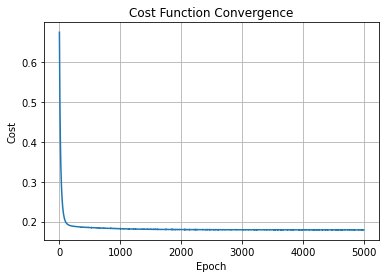

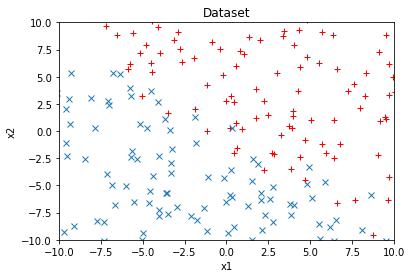

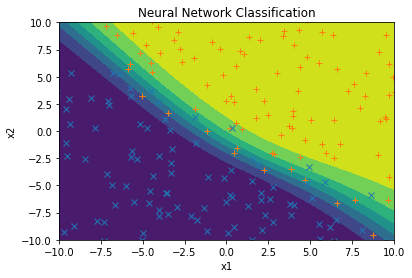

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from utils import sum_gt_zero, xor
from tensorflow.keras import models, layers, losses, optimizers, activations, metrics, regularizers
import os

# Comment this line to enable training using your GPU
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# lambda_l2 = 0.000  # lambda parameter of the L2 regularization
lambda_l2 = 0.002  # lambda parameter of the L2 regularization
num_cases = 200  # number of auto-generated cases
num_epochs = 5000  # number of epochs for training
classification_function = sum_gt_zero  # selects sum_gt_zero as the classification function
# classification_function = xor  # selects xor as the classification function
# Figure format used for saving figures
fig_format = 'png'
# fig_format = 'svg'
# fig_format = 'eps'

if classification_function == sum_gt_zero:
    function_name = 'sgz'
else:
    function_name = 'xor'

# Setting the random seed of numpy's random library for reproducibility reasons
np.random.seed(0)

# Creating the dataset
inputs = 10.0 * (-1.0 + 2.0 * np.random.rand(num_cases, 2))
expected_outputs = np.array([classification_function(x) for x in inputs])
inputs += 2.0 * (-1.0 + 2.0 * np.random.rand(num_cases, 2))  # adding noise to corrupt the dataset

# Separating the dataset into positive and negative samples
positives_array = inputs[expected_outputs >= 0.5, :]
negatives_array = inputs[expected_outputs < 0.5, :]

# Creates the neural network model in Keras
model = models.Sequential()

# Adds the first layer
# The first argument refers to the number of neurons in this layer
# 'activation' configures the activation function
# input_shape represents the size of the input
# kernel_regularizer configures regularization for this layer
model.add(layers.Dense(50, activation=activations.sigmoid, input_shape=(2,),
                       kernel_regularizer=regularizers.l2(lambda_l2)))
model.add(layers.Dense(1, activation=activations.sigmoid, kernel_regularizer=regularizers.l2(lambda_l2)))

model.compile(optimizer=optimizers.Adam(), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

history = model.fit(inputs, expected_outputs, batch_size=(num_cases // 4), epochs=num_epochs)

# Plotting cost function convergence
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid()
plt.savefig('results/convergence_' + function_name + '_l' + str(lambda_l2) + '.' + fig_format, format=fig_format)

# Plotting positive and negative samples
plt.figure()
plt.plot(positives_array[:, 0], positives_array[:, 1], '+r')
plt.plot(negatives_array[:, 0], negatives_array[:, 1], 'x')
plt.xlim([-10.0, 10.0])
plt.ylim([-10.0, 10.0])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset')
plt.savefig('results/dataset_' + function_name + '_l' + str(lambda_l2) + '.' + fig_format, format=fig_format)

# Plotting the decision regions of the neural network
plt.figure()
x = np.arange(-10.0, 10.05, 0.05)
y = np.arange(-10.0, 10.05, 0.05)
X, Y = np.meshgrid(x, y)
x = np.reshape(X, (np.size(X, 0) * np.size(X, 1), 1))
y = np.reshape(Y, (np.size(Y, 0) * np.size(Y, 1), 1))
input = np.concatenate((x, y), axis=1)
z = model.predict(input)
Z = z.reshape((np.size(X, 0), np.size(Y, 0)))
plt.contourf(X, Y, Z)
plt.xlim([-10.0, 10.0])
plt.ylim([-10.0, 10.0])
plt.plot(positives_array[:, 0], positives_array[:, 1], '+', color='tab:orange')
plt.plot(negatives_array[:, 0], negatives_array[:, 1], 'x')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Neural Network Classification')
plt.savefig('results/nn_classification_' + function_name + '_l' + str(lambda_l2) + '.' + fig_format, format=fig_format)

## 4.3. *Imitation Learning*

Usando Keras, implemente uma rede neural de acordo com a arquitetura apresentada na Tabela 1. Leve em consideração o seguinte para o treinamento:

- Não use regularização.
- Use todo o *dataset* em cada iteração do treinamento.
- Use erro quadrático como *loss*.
- Coloque os gráficos gerados no seu relatório e discuta os resultados.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, losses, optimizers, activations, regularizers
from math import pi

# Joints' order in the dataset
joints_dict = dict()
joints_dict['leftAnklePitch'] = 0
joints_dict['leftAnkleRoll'] = 1
joints_dict['leftElbowYaw'] = 2
joints_dict['leftHipPitch'] = 3
joints_dict['leftHipRoll'] = 4
joints_dict['leftHipYaw'] = 5
joints_dict['leftKneePitch'] = 6
joints_dict['leftShoulderPitch'] = 7
joints_dict['leftShoulderRoll'] = 8
joints_dict['neckPitch'] = 9
joints_dict['neckYaw'] = 10
joints_dict['rightAnklePitch'] = 11
joints_dict['rightAnkleRoll'] = 12
joints_dict['rightElbowYaw'] = 13
joints_dict['rightHipPitch'] = 14
joints_dict['rightHipRoll'] = 15
joints_dict['rightHipYaw'] = 16
joints_dict['rightKneePitch'] = 17
joints_dict['rightShoulderPitch'] = 18
joints_dict['rightShoulderRoll'] = 19

right_leg_joints = ['rightHipRoll', 'rightHipPitch', 'rightKneePitch', 'rightAnklePitch', 'rightAnkleRoll']

num_epochs = 30000  # number of epochs for training
# Figure format used for saving figures
fig_format = 'png'
# fig_format = 'svg'
# fig_format = 'eps'

# Loading the dataset
positions = np.loadtxt('positions.txt')
# The dataset contains the walking cycles, but we will use only the first one for training
expected_output = positions[0:40, :]
# Creating a input vector (0.008 ms is the sample time of the walking algorithm)
input = 0.008 * np.arange(0, expected_output.shape[0])

# Setting the random seed of numpy's random library for reproducibility reasons
np.random.seed(0)

$\color{red}{\textbf{Implemente aqui a rede neural usando Keras}}$
 
❗ ❗ descomente a linha ```output = model.predict(input_predict)``` e remova a outra conforme comentário no código.

In [45]:
# Todo: Implement and train the neural network using Keras
model = models.Sequential()
model.add(layers.Dense(75, activation=activations.linear, input_shape=(1,)))
model.add(layers.LeakyReLU(0.01))
model.add(layers.Dense(50, activation=activations.linear))
model.add(layers.LeakyReLU(0.01)) 
model.add(layers.Dense(20, activation=activations.linear))

model.compile(optimizer=optimizers.Adam(), loss=losses.mean_squared_error)

history = model.fit(input, expected_output, epochs=num_epochs)



# Predict the output from the Neural Network
input_predict = np.arange(0, input[-1] + 0.001, 0.001)
output = model.predict(input_predict)  # add this line to predict the output from the Neural Network
# output = np.zeros((len(input_predict), np.size(expected_output, 1)))  # remove this line

Epoch 1/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.4027
Epoch 2/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.3959
Epoch 3/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.3887
Epoch 4/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.3809
Epoch 5/30000
2/2 [==============================] - 0s 4ms/step - loss: 0.3724
Epoch 6/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.3632
Epoch 7/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.3531
Epoch 8/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.3422
Epoch 9/30000
2/2 [==============================] - 0s 4ms/step - loss: 0.3304
Epoch 10/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.3178
Epoch 11/30000
2/2 [==============================] - 0s 4ms/step - loss: 0.3040
Epoch 12/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.2894
Epoch 13/30000
2/2 [=================

2/2 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 103/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 104/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 105/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 106/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 107/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 108/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 109/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 110/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 111/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 112/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 113/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 114/30000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 203/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 204/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 205/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 206/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 207/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 208/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 209/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 210/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 211/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 212/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 213/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 214/30000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 303/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 304/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 305/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 306/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 307/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 308/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 309/30000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 310/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 311/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 312/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 313/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 314/30000
2/2 [===========

2/2 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 403/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 404/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 405/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 406/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 407/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 408/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 409/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 410/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 411/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 412/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 413/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 414/30000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 503/30000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 504/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 505/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 506/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 507/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 508/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 509/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 510/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 511/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 512/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 513/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 514/30000
2/2 [==========

2/2 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 603/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 604/30000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 605/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 606/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 607/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 608/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 609/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 610/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 611/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 612/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 613/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 614/30000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 703/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 704/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 705/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 706/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 707/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 708/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 709/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 710/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 711/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 712/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 713/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 714/30000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 803/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 804/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 805/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 806/30000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 807/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 808/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 809/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 810/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 811/30000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 812/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 813/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 814/30000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 903/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 904/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 905/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 906/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 907/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 908/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 909/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 910/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 911/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 912/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 913/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 914/30000
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1003/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1004/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1005/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1006/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1007/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1008/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1009/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1010/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1011/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1012/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1013/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1014/30000
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1101/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1102/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1103/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1104/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1105/30000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 1106/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1107/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1108/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1109/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1110/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1111/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1112/30000
2/2

2/2 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1199/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1200/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1201/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1202/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1203/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1204/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1205/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1206/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1207/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1208/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1209/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1210/30000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1297/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1298/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1299/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1300/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1301/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1302/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1303/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 1304/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1305/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 1306/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1307/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1308/30000
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1395/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1396/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1397/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1398/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1399/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1400/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1401/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1402/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1403/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1404/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1405/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1406/30000
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1493/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1494/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1495/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1496/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1497/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1498/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 1499/30000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1500/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1501/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1502/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1503/30000
2/2 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1504/30000
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 9.7724e-04
Epoch 1591/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8006e-04
Epoch 1592/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.8343e-04
Epoch 1593/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.8578e-04
Epoch 1594/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.7690e-04
Epoch 1595/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7088e-04
Epoch 1596/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5875e-04
Epoch 1597/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.5540e-04
Epoch 1598/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.6057e-04
Epoch 1599/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.5864e-04
Epoch 1600/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5631e-04
Epoch 1601/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 2ms/step - loss: 8.6833e-04
Epoch 1685/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4036e-04
Epoch 1686/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.6262e-04
Epoch 1687/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.5489e-04
Epoch 1688/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.3696e-04
Epoch 1689/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6552e-04
Epoch 1690/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.6287e-04
Epoch 1691/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.4345e-04
Epoch 1692/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.3642e-04
Epoch 1693/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.4204e-04
Epoch 1694/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4550e-04
Epoch 1695/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 2ms/step - loss: 7.4400e-04
Epoch 1779/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.4376e-04
Epoch 1780/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.3653e-04
Epoch 1781/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.3300e-04
Epoch 1782/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.3723e-04
Epoch 1783/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.3795e-04
Epoch 1784/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.3194e-04
Epoch 1785/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.2817e-04
Epoch 1786/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3661e-04
Epoch 1787/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.2270e-04
Epoch 1788/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.3305e-04
Epoch 1789/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 3ms/step - loss: 6.5177e-04
Epoch 1873/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.5271e-04
Epoch 1874/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.6033e-04
Epoch 1875/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.5227e-04
Epoch 1876/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.7398e-04
Epoch 1877/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.5911e-04
Epoch 1878/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.8476e-04
Epoch 1879/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.6944e-04
Epoch 1880/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.6309e-04
Epoch 1881/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.8300e-04
Epoch 1882/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.5044e-04
Epoch 1883/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 2ms/step - loss: 5.8973e-04
Epoch 1967/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.0016e-04
Epoch 1968/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.8722e-04
Epoch 1969/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.0319e-04
Epoch 1970/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.9755e-04
Epoch 1971/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.9409e-04
Epoch 1972/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.9422e-04
Epoch 1973/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.8031e-04
Epoch 1974/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.9332e-04
Epoch 1975/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.1529e-04
Epoch 1976/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.0873e-04
Epoch 1977/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 3ms/step - loss: 5.5050e-04
Epoch 2061/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.4126e-04
Epoch 2062/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.3570e-04
Epoch 2063/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.4020e-04
Epoch 2064/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.5976e-04
Epoch 2065/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.3086e-04
Epoch 2066/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.8882e-04
Epoch 2067/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.0112e-04
Epoch 2068/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.7481e-04
Epoch 2069/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.8575e-04
Epoch 2070/30000
2/2 [==============================] - 0s 4ms/step - loss: 5.7207e-04
Epoch 2071/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 5.0081e-04
Epoch 2155/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.9187e-04
Epoch 2156/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.9393e-04
Epoch 2157/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.9508e-04
Epoch 2158/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.0806e-04
Epoch 2159/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.9387e-04
Epoch 2160/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.9390e-04
Epoch 2161/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.8610e-04
Epoch 2162/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.9122e-04
Epoch 2163/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.1278e-04
Epoch 2164/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.0516e-04
Epoch 2165/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 4ms/step - loss: 4.4974e-04
Epoch 2249/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.5039e-04
Epoch 2250/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.4979e-04
Epoch 2251/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.4557e-04
Epoch 2252/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.4999e-04
Epoch 2253/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.4548e-04
Epoch 2254/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.4830e-04
Epoch 2255/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.4706e-04
Epoch 2256/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.4368e-04
Epoch 2257/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.4340e-04
Epoch 2258/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.4696e-04
Epoch 2259/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 2ms/step - loss: 4.2654e-04
Epoch 2343/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.1885e-04
Epoch 2344/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.1425e-04
Epoch 2345/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.5029e-04
Epoch 2346/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.1057e-04
Epoch 2347/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.6556e-04
Epoch 2348/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.0853e-04
Epoch 2349/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.5731e-04
Epoch 2350/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.3273e-04
Epoch 2351/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.1401e-04
Epoch 2352/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.7733e-04
Epoch 2353/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 3ms/step - loss: 3.7044e-04
Epoch 2437/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.6269e-04
Epoch 2438/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.6325e-04
Epoch 2439/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.5834e-04
Epoch 2440/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.5642e-04
Epoch 2441/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.5968e-04
Epoch 2442/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.4987e-04
Epoch 2443/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.6013e-04
Epoch 2444/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.7689e-04
Epoch 2445/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.6692e-04
Epoch 2446/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.6286e-04
Epoch 2447/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 2ms/step - loss: 3.2750e-04
Epoch 2531/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.2986e-04
Epoch 2532/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.2137e-04
Epoch 2533/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.3087e-04
Epoch 2534/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.1276e-04
Epoch 2535/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.3145e-04
Epoch 2536/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.2633e-04
Epoch 2537/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.1515e-04
Epoch 2538/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.2099e-04
Epoch 2539/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.2525e-04
Epoch 2540/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.1385e-04
Epoch 2541/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 3ms/step - loss: 2.8216e-04
Epoch 2625/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.7697e-04
Epoch 2626/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.7832e-04
Epoch 2627/30000
2/2 [==============================] - 0s 2ms/step - loss: 2.9338e-04
Epoch 2628/30000
2/2 [==============================] - 0s 2ms/step - loss: 2.8992e-04
Epoch 2629/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.8752e-04
Epoch 2630/30000
2/2 [==============================] - 0s 2ms/step - loss: 2.7562e-04
Epoch 2631/30000
2/2 [==============================] - 0s 2ms/step - loss: 2.8811e-04
Epoch 2632/30000
2/2 [==============================] - 0s 2ms/step - loss: 2.9246e-04
Epoch 2633/30000
2/2 [==============================] - 0s 2ms/step - loss: 2.8737e-04
Epoch 2634/30000
2/2 [==============================] - 0s 2ms/step - loss: 2.7951e-04
Epoch 2635/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 2.3478e-04
Epoch 2719/30000
2/2 [==============================] - 0s 2ms/step - loss: 2.3886e-04
Epoch 2720/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3045e-04
Epoch 2721/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2746e-04
Epoch 2722/30000
2/2 [==============================] - 0s 2ms/step - loss: 2.2781e-04
Epoch 2723/30000
2/2 [==============================] - 0s 2ms/step - loss: 2.2370e-04
Epoch 2724/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2113e-04
Epoch 2725/30000
2/2 [==============================] - 0s 2ms/step - loss: 2.1567e-04
Epoch 2726/30000
2/2 [==============================] - 0s 2ms/step - loss: 2.1930e-04
Epoch 2727/30000
2/2 [==============================] - 0s 2ms/step - loss: 2.1608e-04
Epoch 2728/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1440e-04
Epoch 2729/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 3ms/step - loss: 1.6541e-04
Epoch 2813/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6713e-04
Epoch 2814/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.6442e-04
Epoch 2815/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.6482e-04
Epoch 2816/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6107e-04
Epoch 2817/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7108e-04
Epoch 2818/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.6716e-04
Epoch 2819/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.6192e-04
Epoch 2820/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6966e-04
Epoch 2821/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.6392e-04
Epoch 2822/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7133e-04
Epoch 2823/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 2ms/step - loss: 1.4430e-04
Epoch 2907/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4281e-04
Epoch 2908/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4609e-04
Epoch 2909/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.4327e-04
Epoch 2910/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.4305e-04
Epoch 2911/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.4702e-04
Epoch 2912/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4364e-04
Epoch 2913/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.5052e-04
Epoch 2914/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.4226e-04
Epoch 2915/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.4135e-04
Epoch 2916/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.5080e-04
Epoch 2917/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 3ms/step - loss: 1.3489e-04
Epoch 3001/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3052e-04
Epoch 3002/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3429e-04
Epoch 3003/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3326e-04
Epoch 3004/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.3030e-04
Epoch 3005/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3583e-04
Epoch 3006/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.3018e-04
Epoch 3007/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.3249e-04
Epoch 3008/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.3024e-04
Epoch 3009/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3017e-04
Epoch 3010/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.3220e-04
Epoch 3011/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 3ms/step - loss: 1.2649e-04
Epoch 3095/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2541e-04
Epoch 3096/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2743e-04
Epoch 3097/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.3105e-04
Epoch 3098/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2352e-04
Epoch 3099/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4174e-04
Epoch 3100/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3234e-04
Epoch 3101/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.3003e-04
Epoch 3102/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2787e-04
Epoch 3103/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.2596e-04
Epoch 3104/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.2337e-04
Epoch 3105/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 2ms/step - loss: 1.2143e-04
Epoch 3189/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.2257e-04
Epoch 3190/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2722e-04
Epoch 3191/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2304e-04
Epoch 3192/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2520e-04
Epoch 3193/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.2971e-04
Epoch 3194/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2462e-04
Epoch 3195/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2804e-04
Epoch 3196/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2766e-04
Epoch 3197/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.2584e-04
Epoch 3198/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.2516e-04
Epoch 3199/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 2ms/step - loss: 1.2805e-04
Epoch 3283/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1964e-04
Epoch 3284/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.3013e-04
Epoch 3285/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.1861e-04
Epoch 3286/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2988e-04
Epoch 3287/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.2175e-04
Epoch 3288/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2796e-04
Epoch 3289/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2025e-04
Epoch 3290/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2860e-04
Epoch 3291/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.2176e-04
Epoch 3292/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.2729e-04
Epoch 3293/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 4ms/step - loss: 1.2210e-04
Epoch 3377/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2164e-04
Epoch 3378/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2193e-04
Epoch 3379/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2536e-04
Epoch 3380/30000
2/2 [==============================] - 0s 33ms/step - loss: 1.2846e-04
Epoch 3381/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2574e-04
Epoch 3382/30000
2/2 [==============================] - 0s 7ms/step - loss: 1.2155e-04
Epoch 3383/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2714e-04
Epoch 3384/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1892e-04
Epoch 3385/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2352e-04
Epoch 3386/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2545e-04
Epoch 3387/30000
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 2ms/step - loss: 1.1859e-04
Epoch 3471/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.1723e-04
Epoch 3472/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.2495e-04
Epoch 3473/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.1599e-04
Epoch 3474/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1745e-04
Epoch 3475/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.2651e-04
Epoch 3476/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.1742e-04
Epoch 3477/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.1267e-04
Epoch 3478/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.3062e-04
Epoch 3479/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1635e-04
Epoch 3480/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.1420e-04
Epoch 3481/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 2ms/step - loss: 1.2024e-04
Epoch 3565/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.1605e-04
Epoch 3566/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0752e-04
Epoch 3567/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2159e-04
Epoch 3568/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1944e-04
Epoch 3569/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1926e-04
Epoch 3570/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1649e-04
Epoch 3571/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.1733e-04
Epoch 3572/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1848e-04
Epoch 3573/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2009e-04
Epoch 3574/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2026e-04
Epoch 3575/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 4ms/step - loss: 1.1322e-04
Epoch 3659/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1156e-04
Epoch 3660/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0919e-04
Epoch 3661/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0833e-04
Epoch 3662/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1152e-04
Epoch 3663/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1051e-04
Epoch 3664/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0942e-04
Epoch 3665/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0639e-04
Epoch 3666/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0733e-04
Epoch 3667/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1178e-04
Epoch 3668/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1075e-04
Epoch 3669/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 1.1575e-04
Epoch 3753/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0636e-04
Epoch 3754/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0998e-04
Epoch 3755/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.1078e-04
Epoch 3756/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1173e-04
Epoch 3757/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0636e-04
Epoch 3758/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1083e-04
Epoch 3759/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0762e-04
Epoch 3760/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1367e-04
Epoch 3761/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0675e-04
Epoch 3762/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1573e-04
Epoch 3763/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 2ms/step - loss: 1.1258e-04
Epoch 3847/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0776e-04
Epoch 3848/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0625e-04
Epoch 3849/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0638e-04
Epoch 3850/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0494e-04
Epoch 3851/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.1104e-04
Epoch 3852/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0372e-04
Epoch 3853/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0558e-04
Epoch 3854/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0702e-04
Epoch 3855/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0577e-04
Epoch 3856/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0334e-04
Epoch 3857/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 2ms/step - loss: 1.0243e-04
Epoch 3941/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0788e-04
Epoch 3942/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0598e-04
Epoch 3943/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0449e-04
Epoch 3944/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0943e-04
Epoch 3945/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0517e-04
Epoch 3946/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0671e-04
Epoch 3947/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0345e-04
Epoch 3948/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0006e-04
Epoch 3949/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0361e-04
Epoch 3950/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0268e-04
Epoch 3951/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 3ms/step - loss: 1.0154e-04
Epoch 4035/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0169e-04
Epoch 4036/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0169e-04
Epoch 4037/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0157e-04
Epoch 4038/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.9840e-05
Epoch 4039/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8779e-05
Epoch 4040/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0158e-04
Epoch 4041/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.9612e-05
Epoch 4042/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0472e-04
Epoch 4043/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0430e-04
Epoch 4044/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0080e-04
Epoch 4045/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 7ms/step - loss: 9.8299e-05
Epoch 4129/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0610e-04
Epoch 4130/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0462e-04
Epoch 4131/30000
2/2 [==============================] - 0s 5ms/step - loss: 9.7582e-05
Epoch 4132/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.9167e-05
Epoch 4133/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0000e-04
Epoch 4134/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5008e-05
Epoch 4135/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0405e-04
Epoch 4136/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.0932e-04
Epoch 4137/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7002e-05
Epoch 4138/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.8157e-05
Epoch 4139/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 5ms/step - loss: 1.0187e-04
Epoch 4223/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.4278e-05
Epoch 4224/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1205e-04
Epoch 4225/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0388e-04
Epoch 4226/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0088e-04
Epoch 4227/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.7194e-05
Epoch 4228/30000
2/2 [==============================] - 0s 6ms/step - loss: 1.0083e-04
Epoch 4229/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7777e-05
Epoch 4230/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6750e-05
Epoch 4231/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5859e-05
Epoch 4232/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.6416e-05
Epoch 4233/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 2ms/step - loss: 1.0546e-04
Epoch 4317/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0654e-04
Epoch 4318/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.1713e-04
Epoch 4319/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0588e-04
Epoch 4320/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8587e-05
Epoch 4321/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0443e-04
Epoch 4322/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0295e-04
Epoch 4323/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.5730e-05
Epoch 4324/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5765e-05
Epoch 4325/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.4547e-05
Epoch 4326/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0552e-04
Epoch 4327/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 2ms/step - loss: 9.8455e-05
Epoch 4411/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.0383e-04
Epoch 4412/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.6011e-05
Epoch 4413/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.7318e-05
Epoch 4414/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5290e-05
Epoch 4415/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0643e-04
Epoch 4416/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7875e-05
Epoch 4417/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6351e-05
Epoch 4418/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.5811e-05
Epoch 4419/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.5579e-05
Epoch 4420/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.4310e-05
Epoch 4421/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 2ms/step - loss: 1.0025e-04
Epoch 4505/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0526e-04
Epoch 4506/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.0786e-05
Epoch 4507/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.6265e-05
Epoch 4508/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8303e-05
Epoch 4509/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.9484e-05
Epoch 4510/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.8104e-05
Epoch 4511/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.9948e-05
Epoch 4512/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.6672e-05
Epoch 4513/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.9217e-05
Epoch 4514/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6176e-05
Epoch 4515/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 9.4545e-05
Epoch 4599/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0211e-05
Epoch 4600/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1631e-05
Epoch 4601/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6748e-05
Epoch 4602/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.9153e-05
Epoch 4603/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0578e-05
Epoch 4604/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.4012e-05
Epoch 4605/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5001e-05
Epoch 4606/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1052e-05
Epoch 4607/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9247e-05
Epoch 4608/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3234e-05
Epoch 4609/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 8.9355e-05
Epoch 4693/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9493e-05
Epoch 4694/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.5320e-05
Epoch 4695/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4943e-05
Epoch 4696/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7264e-05
Epoch 4697/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.3377e-05
Epoch 4698/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3129e-05
Epoch 4699/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.6750e-05
Epoch 4700/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.4886e-05
Epoch 4701/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0794e-04
Epoch 4702/30000
2/2 [==============================] - 0s 2ms/step - loss: 9.5636e-05
Epoch 4703/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 4ms/step - loss: 8.2905e-05
Epoch 4787/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.3687e-05
Epoch 4788/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5974e-05
Epoch 4789/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6028e-05
Epoch 4790/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.7074e-05
Epoch 4791/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5826e-05
Epoch 4792/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.9678e-05
Epoch 4793/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.9774e-05
Epoch 4794/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.9582e-05
Epoch 4795/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7028e-05
Epoch 4796/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2937e-05
Epoch 4797/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 8.3459e-05
Epoch 4881/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.4125e-05
Epoch 4882/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5264e-05
Epoch 4883/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3106e-05
Epoch 4884/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1416e-05
Epoch 4885/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1868e-05
Epoch 4886/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9733e-05
Epoch 4887/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.9117e-05
Epoch 4888/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.1703e-05
Epoch 4889/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.9190e-05
Epoch 4890/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.1178e-05
Epoch 4891/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 8.1966e-05
Epoch 4975/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5201e-05
Epoch 4976/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3103e-05
Epoch 4977/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.4840e-05
Epoch 4978/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5557e-05
Epoch 4979/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.5345e-05
Epoch 4980/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4652e-05
Epoch 4981/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0115e-05
Epoch 4982/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.3452e-05
Epoch 4983/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7682e-05
Epoch 4984/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6820e-05
Epoch 4985/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 2ms/step - loss: 8.4045e-05
Epoch 5069/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.9511e-05
Epoch 5070/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4086e-05
Epoch 5071/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.9483e-05
Epoch 5072/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4064e-05
Epoch 5073/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.1229e-05
Epoch 5074/30000
2/2 [==============================] - 0s 10ms/step - loss: 7.7294e-05
Epoch 5075/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3880e-05
Epoch 5076/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1194e-05
Epoch 5077/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7716e-05
Epoch 5078/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.8041e-05
Epoch 5079/30000
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 2ms/step - loss: 7.5685e-05
Epoch 5163/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.9216e-05
Epoch 5164/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1264e-05
Epoch 5165/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.0404e-05
Epoch 5166/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7928e-05
Epoch 5167/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3655e-05
Epoch 5168/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7517e-05
Epoch 5169/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4143e-05
Epoch 5170/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.6237e-05
Epoch 5171/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.7132e-05
Epoch 5172/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7655e-05
Epoch 5173/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 3ms/step - loss: 8.4341e-05
Epoch 5257/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.7334e-05
Epoch 5258/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.8680e-05
Epoch 5259/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.6779e-05
Epoch 5260/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.1037e-05
Epoch 5261/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.4055e-05
Epoch 5262/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8423e-05
Epoch 5263/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.6551e-05
Epoch 5264/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.2414e-05
Epoch 5265/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.0182e-05
Epoch 5266/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6056e-05
Epoch 5267/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 3ms/step - loss: 7.5251e-05
Epoch 5351/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.2052e-05
Epoch 5352/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4116e-05
Epoch 5353/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.7360e-05
Epoch 5354/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8315e-05
Epoch 5355/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.5276e-05
Epoch 5356/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4957e-05
Epoch 5357/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0240e-05
Epoch 5358/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.9207e-05
Epoch 5359/30000
2/2 [==============================] - 0s 2ms/step - loss: 8.4241e-05
Epoch 5360/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.9002e-05
Epoch 5361/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 2ms/step - loss: 7.0132e-05
Epoch 5445/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.1226e-05
Epoch 5446/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.9205e-05
Epoch 5447/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.4028e-05
Epoch 5448/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4163e-05
Epoch 5449/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.0793e-05
Epoch 5450/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.5052e-05
Epoch 5451/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.2893e-05
Epoch 5452/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.0217e-05
Epoch 5453/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.1724e-05
Epoch 5454/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3280e-05
Epoch 5455/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 3ms/step - loss: 7.1838e-05
Epoch 5539/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.5654e-05
Epoch 5540/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6180e-05
Epoch 5541/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.3051e-05
Epoch 5542/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.4362e-05
Epoch 5543/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5559e-05
Epoch 5544/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.9507e-05
Epoch 5545/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.0853e-05
Epoch 5546/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.0332e-05
Epoch 5547/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.0140e-05
Epoch 5548/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.0218e-05
Epoch 5549/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 2ms/step - loss: 7.0774e-05
Epoch 5633/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.5860e-05
Epoch 5634/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.4018e-05
Epoch 5635/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.4994e-05
Epoch 5636/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.3817e-05
Epoch 5637/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.2758e-05
Epoch 5638/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.1517e-05
Epoch 5639/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.9077e-05
Epoch 5640/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.1625e-05
Epoch 5641/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.9592e-05
Epoch 5642/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7720e-05
Epoch 5643/30000
2/2 [==============================] - 0s 4

2/2 [==============================] - 0s 4ms/step - loss: 6.5608e-05
Epoch 5727/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.7977e-05
Epoch 5728/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6586e-05
Epoch 5729/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.7635e-05
Epoch 5730/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.9659e-05
Epoch 5731/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.7908e-05
Epoch 5732/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.5227e-05
Epoch 5733/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.7405e-05
Epoch 5734/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.9821e-05
Epoch 5735/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4712e-05
Epoch 5736/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.3285e-05
Epoch 5737/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 3ms/step - loss: 6.6642e-05
Epoch 5821/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.6736e-05
Epoch 5822/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.5926e-05
Epoch 5823/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.3320e-05
Epoch 5824/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.9515e-05
Epoch 5825/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3188e-05
Epoch 5826/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.8887e-05
Epoch 5827/30000
2/2 [==============================] - 0s 5ms/step - loss: 6.4273e-05
Epoch 5828/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0474e-05
Epoch 5829/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.6758e-05
Epoch 5830/30000
2/2 [==============================] - 0s 2ms/step - loss: 7.0762e-05
Epoch 5831/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 3ms/step - loss: 6.2091e-05
Epoch 5915/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.4287e-05
Epoch 5916/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.4083e-05
Epoch 5917/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.3620e-05
Epoch 5918/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.5109e-05
Epoch 5919/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.1509e-05
Epoch 5920/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.2012e-05
Epoch 5921/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.5028e-05
Epoch 5922/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.2730e-05
Epoch 5923/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.2409e-05
Epoch 5924/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.1145e-05
Epoch 5925/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 3ms/step - loss: 6.1517e-05
Epoch 6009/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.1421e-05
Epoch 6010/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.8826e-05
Epoch 6011/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.2442e-05
Epoch 6012/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.0330e-05
Epoch 6013/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.0567e-05
Epoch 6014/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.0198e-05
Epoch 6015/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.3754e-05
Epoch 6016/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.1336e-05
Epoch 6017/30000
2/2 [==============================] - 0s 4ms/step - loss: 5.9288e-05
Epoch 6018/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.9397e-05
Epoch 6019/30000
2/2 [==============================] - 0s 4

2/2 [==============================] - 0s 3ms/step - loss: 5.9139e-05
Epoch 6103/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.8919e-05
Epoch 6104/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.9574e-05
Epoch 6105/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.8353e-05
Epoch 6106/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.0352e-05
Epoch 6107/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.0319e-05
Epoch 6108/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.6993e-05
Epoch 6109/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.7966e-05
Epoch 6110/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.7055e-05
Epoch 6111/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.9006e-05
Epoch 6112/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.0194e-05
Epoch 6113/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 2ms/step - loss: 6.4795e-05
Epoch 6197/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.6968e-05
Epoch 6198/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.7447e-05
Epoch 6199/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.3411e-05
Epoch 6200/30000
2/2 [==============================] - 0s 2ms/step - loss: 6.2386e-05
Epoch 6201/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.5457e-05
Epoch 6202/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.5776e-05
Epoch 6203/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.8256e-05
Epoch 6204/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.5203e-05
Epoch 6205/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.5786e-05
Epoch 6206/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.4819e-05
Epoch 6207/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 5.3590e-05
Epoch 6291/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.5603e-05
Epoch 6292/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.4011e-05
Epoch 6293/30000
2/2 [==============================] - 0s 4ms/step - loss: 5.4054e-05
Epoch 6294/30000
2/2 [==============================] - 0s 4ms/step - loss: 5.4772e-05
Epoch 6295/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.7473e-05
Epoch 6296/30000
2/2 [==============================] - ETA: 0s - loss: 5.2901e-0 - 0s 3ms/step - loss: 5.7740e-05
Epoch 6297/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.5864e-05
Epoch 6298/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.7733e-05
Epoch 6299/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.5093e-05
Epoch 6300/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.4433e-05
Epoch 6301/30000
2/2 [==========

2/2 [==============================] - 0s 2ms/step - loss: 5.2468e-05
Epoch 6384/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.2373e-05
Epoch 6385/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.6888e-05
Epoch 6386/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.6807e-05
Epoch 6387/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.1878e-05
Epoch 6388/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.3392e-05
Epoch 6389/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.1665e-05
Epoch 6390/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.9105e-05
Epoch 6391/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.3202e-05
Epoch 6392/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.9486e-05
Epoch 6393/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.2782e-05
Epoch 6394/30000
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 3ms/step - loss: 5.1638e-05
Epoch 6478/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.1545e-05
Epoch 6479/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.4821e-05
Epoch 6480/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.7457e-05
Epoch 6481/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.5374e-05
Epoch 6482/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.3308e-05
Epoch 6483/30000
2/2 [==============================] - 0s 4ms/step - loss: 5.7222e-05
Epoch 6484/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.5644e-05
Epoch 6485/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.0376e-05
Epoch 6486/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.1014e-05
Epoch 6487/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.1129e-05
Epoch 6488/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 5.2404e-05
Epoch 6572/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.3440e-05
Epoch 6573/30000
2/2 [==============================] - 0s 4ms/step - loss: 4.7493e-05
Epoch 6574/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.2228e-05
Epoch 6575/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.9403e-05
Epoch 6576/30000
2/2 [==============================] - 0s 4ms/step - loss: 4.8708e-05
Epoch 6577/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.0440e-05
Epoch 6578/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.9535e-05
Epoch 6579/30000
2/2 [==============================] - 0s 4ms/step - loss: 4.8493e-05
Epoch 6580/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.8702e-05
Epoch 6581/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.1049e-05
Epoch 6582/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 2ms/step - loss: 4.7790e-05
Epoch 6666/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.1449e-05
Epoch 6667/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.8077e-05
Epoch 6668/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.8469e-05
Epoch 6669/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.1656e-05
Epoch 6670/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.1868e-05
Epoch 6671/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.8486e-05
Epoch 6672/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.2085e-05
Epoch 6673/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.9031e-05
Epoch 6674/30000
2/2 [==============================] - 0s 2ms/step - loss: 5.1101e-05
Epoch 6675/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.0234e-05
Epoch 6676/30000
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 3ms/step - loss: 4.6491e-05
Epoch 6760/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.6973e-05
Epoch 6761/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.3576e-05
Epoch 6762/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.7789e-05
Epoch 6763/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.8412e-05
Epoch 6764/30000
2/2 [==============================] - 0s 3ms/step - loss: 5.0044e-05
Epoch 6765/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.4174e-05
Epoch 6766/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.2656e-05
Epoch 6767/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.7923e-05
Epoch 6768/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.4863e-05
Epoch 6769/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.3976e-05
Epoch 6770/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 2ms/step - loss: 4.2828e-05
Epoch 6854/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.6406e-05
Epoch 6855/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.5901e-05
Epoch 6856/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.1509e-05
Epoch 6857/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.2162e-05
Epoch 6858/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.3831e-05
Epoch 6859/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.3283e-05
Epoch 6860/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.6150e-05
Epoch 6861/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.4968e-05
Epoch 6862/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.2818e-05
Epoch 6863/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.2381e-05
Epoch 6864/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 4.3243e-05
Epoch 6948/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.5855e-05
Epoch 6949/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.7857e-05
Epoch 6950/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.4551e-05
Epoch 6951/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.6982e-05
Epoch 6952/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.5492e-05
Epoch 6953/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.1281e-05
Epoch 6954/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.1740e-05
Epoch 6955/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.5716e-05
Epoch 6956/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.1084e-05
Epoch 6957/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.1015e-05
Epoch 6958/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 3.8632e-05
Epoch 7042/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.9050e-05
Epoch 7043/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.9388e-05
Epoch 7044/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.1374e-05
Epoch 7045/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.9944e-05
Epoch 7046/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.9795e-05
Epoch 7047/30000
2/2 [==============================] - 0s 22ms/step - loss: 4.0577e-05
Epoch 7048/30000
2/2 [==============================] - 0s 5ms/step - loss: 4.0940e-05
Epoch 7049/30000
2/2 [==============================] - 0s 4ms/step - loss: 4.0479e-05
Epoch 7050/30000
2/2 [==============================] - 0s 5ms/step - loss: 4.0773e-05
Epoch 7051/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.1291e-05
Epoch 7052/30000
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 3ms/step - loss: 4.4751e-05
Epoch 7136/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.2389e-05
Epoch 7137/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.9901e-05
Epoch 7138/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.8338e-05
Epoch 7139/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.8402e-05
Epoch 7140/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.9537e-05
Epoch 7141/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.9857e-05
Epoch 7142/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.0660e-05
Epoch 7143/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.8009e-05
Epoch 7144/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.0971e-05
Epoch 7145/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.1307e-05
Epoch 7146/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 4ms/step - loss: 3.7174e-05
Epoch 7230/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.8615e-05
Epoch 7231/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.7148e-05
Epoch 7232/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.7065e-05
Epoch 7233/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.8252e-05
Epoch 7234/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.7500e-05
Epoch 7235/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.6664e-05
Epoch 7236/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.7509e-05
Epoch 7237/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.7783e-05
Epoch 7238/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.7235e-05
Epoch 7239/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.6990e-05
Epoch 7240/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 3.7918e-05
Epoch 7324/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.6416e-05
Epoch 7325/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.6058e-05
Epoch 7326/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.6937e-05
Epoch 7327/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.8239e-05
Epoch 7328/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.6387e-05
Epoch 7329/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.9256e-05
Epoch 7330/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.7535e-05
Epoch 7331/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.6403e-05
Epoch 7332/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.8338e-05
Epoch 7333/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.0214e-05
Epoch 7334/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 3.7567e-05
Epoch 7418/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.5240e-05
Epoch 7419/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.6827e-05
Epoch 7420/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.5593e-05
Epoch 7421/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.4007e-05
Epoch 7422/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.5485e-05
Epoch 7423/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.7873e-05
Epoch 7424/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.7383e-05
Epoch 7425/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.9368e-05
Epoch 7426/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.8499e-05
Epoch 7427/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.8552e-05
Epoch 7428/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 3.4874e-05
Epoch 7512/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.5149e-05
Epoch 7513/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.4830e-05
Epoch 7514/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.6330e-05
Epoch 7515/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.8144e-05
Epoch 7516/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.6909e-05
Epoch 7517/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.9956e-05
Epoch 7518/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.7734e-05
Epoch 7519/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.5782e-05
Epoch 7520/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.9653e-05
Epoch 7521/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.9273e-05
Epoch 7522/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 3.4213e-05
Epoch 7606/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.3762e-05
Epoch 7607/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.4144e-05
Epoch 7608/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.6495e-05
Epoch 7609/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.7709e-05
Epoch 7610/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.0669e-05
Epoch 7611/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.8911e-05
Epoch 7612/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.7839e-05
Epoch 7613/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.3836e-05
Epoch 7614/30000
2/2 [==============================] - 0s 2ms/step - loss: 4.7445e-05
Epoch 7615/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.0020e-05
Epoch 7616/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 3.6748e-05
Epoch 7700/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.3222e-05
Epoch 7701/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.3801e-05
Epoch 7702/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.5753e-05
Epoch 7703/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.6086e-05
Epoch 7704/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.2905e-05
Epoch 7705/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.3408e-05
Epoch 7706/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.7014e-05
Epoch 7707/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.6218e-05
Epoch 7708/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.3064e-05
Epoch 7709/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.3491e-05
Epoch 7710/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 3.5722e-05
Epoch 7794/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.3498e-05
Epoch 7795/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.3652e-05
Epoch 7796/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.4436e-05
Epoch 7797/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.3483e-05
Epoch 7798/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.4257e-05
Epoch 7799/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.3281e-05
Epoch 7800/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.1741e-05
Epoch 7801/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.4090e-05
Epoch 7802/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.2924e-05
Epoch 7803/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.4066e-05
Epoch 7804/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 3.2004e-05
Epoch 7888/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.2693e-05
Epoch 7889/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.9586e-05
Epoch 7890/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.7951e-05
Epoch 7891/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.2869e-05
Epoch 7892/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.3244e-05
Epoch 7893/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.4070e-05
Epoch 7894/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.4136e-05
Epoch 7895/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.6852e-05
Epoch 7896/30000
2/2 [==============================] - 0s 12ms/step - loss: 3.3015e-05
Epoch 7897/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.1580e-05
Epoch 7898/30000
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 4ms/step - loss: 3.4478e-05
Epoch 7982/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.2844e-05
Epoch 7983/30000
2/2 [==============================] - 0s 7ms/step - loss: 3.4867e-05
Epoch 7984/30000
2/2 [==============================] - 0s 13ms/step - loss: 3.1036e-05
Epoch 7985/30000
2/2 [==============================] - 0s 7ms/step - loss: 3.4632e-05
Epoch 7986/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.0914e-05
Epoch 7987/30000
2/2 [==============================] - 0s 5ms/step - loss: 3.6029e-05
Epoch 7988/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.4110e-05
Epoch 7989/30000
2/2 [==============================] - 0s 6ms/step - loss: 3.9332e-05
Epoch 7990/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.5597e-05
Epoch 7991/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.1980e-05
Epoch 7992/30000
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 4ms/step - loss: 3.1205e-05
Epoch 8076/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.9975e-05
Epoch 8077/30000
2/2 [==============================] - 0s 5ms/step - loss: 3.2212e-05
Epoch 8078/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.4376e-05
Epoch 8079/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.2383e-05
Epoch 8080/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.1200e-05
Epoch 8081/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.0119e-05
Epoch 8082/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.1088e-05
Epoch 8083/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.2521e-05
Epoch 8084/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.9773e-05
Epoch 8085/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.0853e-05
Epoch 8086/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 3.1373e-05
Epoch 8170/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.0927e-05
Epoch 8171/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.8942e-05
Epoch 8172/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.2520e-05
Epoch 8173/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.9615e-05
Epoch 8174/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.9815e-05
Epoch 8175/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.4281e-05
Epoch 8176/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.0251e-05
Epoch 8177/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.1571e-05
Epoch 8178/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.8671e-05
Epoch 8179/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.0016e-05
Epoch 8180/30000
2/2 [==============================] - 0s 4

2/2 [==============================] - 0s 3ms/step - loss: 3.1239e-05
Epoch 8264/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.9855e-05
Epoch 8265/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.0052e-05
Epoch 8266/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.0581e-05
Epoch 8267/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.9019e-05
Epoch 8268/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.1702e-05
Epoch 8269/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.2987e-05
Epoch 8270/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.0363e-05
Epoch 8271/30000
2/2 [==============================] - 0s 2ms/step - loss: 3.1517e-05
Epoch 8272/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.9004e-05
Epoch 8273/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.9058e-05
Epoch 8274/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 4ms/step - loss: 3.0312e-05
Epoch 8358/30000
2/2 [==============================] - 0s 6ms/step - loss: 2.7132e-05
Epoch 8359/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.8086e-05
Epoch 8360/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.8646e-05
Epoch 8361/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.6825e-05
Epoch 8362/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.7105e-05
Epoch 8363/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.7468e-05
Epoch 8364/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.6947e-05
Epoch 8365/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.8242e-05
Epoch 8366/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.8407e-05
Epoch 8367/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.8514e-05
Epoch 8368/30000
2/2 [==============================] - 0s 5

2/2 [==============================] - 0s 3ms/step - loss: 2.7279e-05
Epoch 8452/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.8653e-05
Epoch 8453/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.9660e-05
Epoch 8454/30000
2/2 [==============================] - 0s 2ms/step - loss: 2.7337e-05
Epoch 8455/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.6045e-05
Epoch 8456/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.8688e-05
Epoch 8457/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.9929e-05
Epoch 8458/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.0827e-05
Epoch 8459/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.0976e-05
Epoch 8460/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.9704e-05
Epoch 8461/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.9576e-05
Epoch 8462/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 3.0692e-05
Epoch 8546/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.7683e-05
Epoch 8547/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.9117e-05
Epoch 8548/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.7847e-05
Epoch 8549/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.8757e-05
Epoch 8550/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.7964e-05
Epoch 8551/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.8267e-05
Epoch 8552/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.7926e-05
Epoch 8553/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.8329e-05
Epoch 8554/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.9436e-05
Epoch 8555/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.7076e-05
Epoch 8556/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 2.7341e-05
Epoch 8640/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.7673e-05
Epoch 8641/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.8922e-05
Epoch 8642/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.9893e-05
Epoch 8643/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.0712e-05
Epoch 8644/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.8820e-05
Epoch 8645/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.8696e-05
Epoch 8646/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.9945e-05
Epoch 8647/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.0513e-05
Epoch 8648/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.7791e-05
Epoch 8649/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.4454e-05
Epoch 8650/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 6ms/step - loss: 2.7060e-05
Epoch 8734/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.6879e-05
Epoch 8735/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.5851e-05
Epoch 8736/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.6815e-05
Epoch 8737/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.8152e-05
Epoch 8738/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.3514e-05
Epoch 8739/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.3991e-05
Epoch 8740/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.4528e-05
Epoch 8741/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.8831e-05
Epoch 8742/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.9346e-05
Epoch 8743/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.0212e-05
Epoch 8744/30000
2/2 [==============================] - 0s 4

2/2 [==============================] - 0s 5ms/step - loss: 3.2566e-05
Epoch 8828/30000
2/2 [==============================] - ETA: 0s - loss: 3.4872e-0 - 0s 14ms/step - loss: 3.6691e-05
Epoch 8829/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.4535e-05
Epoch 8830/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.5460e-05
Epoch 8831/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.2197e-05
Epoch 8832/30000
2/2 [==============================] - 0s 9ms/step - loss: 3.2419e-05
Epoch 8833/30000
2/2 [==============================] - 0s 6ms/step - loss: 2.7535e-05
Epoch 8834/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.6700e-05
Epoch 8835/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.9515e-05
Epoch 8836/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.7044e-05
Epoch 8837/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.6447e-05
Epoch 8838/30000
2/2 [=========

2/2 [==============================] - 0s 4ms/step - loss: 2.7547e-05
Epoch 8922/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.4094e-05
Epoch 8923/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5295e-05
Epoch 8924/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.4783e-05
Epoch 8925/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.4593e-05
Epoch 8926/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3543e-05
Epoch 8927/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5298e-05
Epoch 8928/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3088e-05
Epoch 8929/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5060e-05
Epoch 8930/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3798e-05
Epoch 8931/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.4927e-05
Epoch 8932/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 2.5096e-05
Epoch 9016/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5481e-05
Epoch 9017/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.4833e-05
Epoch 9018/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5133e-05
Epoch 9019/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5421e-05
Epoch 9020/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.8054e-05
Epoch 9021/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.4191e-05
Epoch 9022/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.6043e-05
Epoch 9023/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5902e-05
Epoch 9024/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5718e-05
Epoch 9025/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.4977e-05
Epoch 9026/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 4ms/step - loss: 2.3487e-05
Epoch 9110/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.3910e-05
Epoch 9111/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5505e-05
Epoch 9112/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.3226e-05
Epoch 9113/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.5192e-05
Epoch 9114/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.6521e-05
Epoch 9115/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5092e-05
Epoch 9116/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.4249e-05
Epoch 9117/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.7802e-05
Epoch 9118/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.4378e-05
Epoch 9119/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.6841e-05
Epoch 9120/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 3.4877e-05
Epoch 9204/30000
2/2 [==============================] - 0s 5ms/step - loss: 3.5237e-05
Epoch 9205/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.2576e-05
Epoch 9206/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.8160e-05
Epoch 9207/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.0025e-05
Epoch 9208/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.1470e-05
Epoch 9209/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.6548e-05
Epoch 9210/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.5399e-05
Epoch 9211/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.0748e-05
Epoch 9212/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.7503e-05
Epoch 9213/30000
2/2 [==============================] - 0s 3ms/step - loss: 4.3203e-05
Epoch 9214/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 7ms/step - loss: 2.2696e-05
Epoch 9298/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2713e-05
Epoch 9299/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2688e-05
Epoch 9300/30000
2/2 [==============================] - 0s 7ms/step - loss: 2.2146e-05
Epoch 9301/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1484e-05
Epoch 9302/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2835e-05
Epoch 9303/30000
2/2 [==============================] - 0s 7ms/step - loss: 2.1384e-05
Epoch 9304/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2098e-05
Epoch 9305/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2586e-05
Epoch 9306/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2221e-05
Epoch 9307/30000
2/2 [==============================] - 0s 6ms/step - loss: 2.2351e-05
Epoch 9308/30000
2/2 [==============================] - 0s 4

2/2 [==============================] - 0s 3ms/step - loss: 2.4112e-05
Epoch 9392/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5175e-05
Epoch 9393/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3157e-05
Epoch 9394/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1762e-05
Epoch 9395/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3577e-05
Epoch 9396/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3404e-05
Epoch 9397/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2813e-05
Epoch 9398/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2044e-05
Epoch 9399/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2750e-05
Epoch 9400/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1754e-05
Epoch 9401/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.3308e-05
Epoch 9402/30000
2/2 [==============================] - 0s 5

2/2 [==============================] - 0s 3ms/step - loss: 2.0924e-05
Epoch 9486/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1106e-05
Epoch 9487/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.0702e-05
Epoch 9488/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1682e-05
Epoch 9489/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1896e-05
Epoch 9490/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1395e-05
Epoch 9491/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1428e-05
Epoch 9492/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0729e-05
Epoch 9493/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3251e-05
Epoch 9494/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1123e-05
Epoch 9495/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.3179e-05
Epoch 9496/30000
2/2 [==============================] - 0s 4

2/2 [==============================] - 0s 3ms/step - loss: 2.3386e-05
Epoch 9580/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1489e-05
Epoch 9581/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.3366e-05
Epoch 9582/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2811e-05
Epoch 9583/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2821e-05
Epoch 9584/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2743e-05
Epoch 9585/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1689e-05
Epoch 9586/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.4371e-05
Epoch 9587/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3753e-05
Epoch 9588/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.6121e-05
Epoch 9589/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.6978e-05
Epoch 9590/30000
2/2 [==============================] - 0s 4

2/2 [==============================] - 0s 4ms/step - loss: 2.0965e-05
Epoch 9674/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2624e-05
Epoch 9675/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2459e-05
Epoch 9676/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1586e-05
Epoch 9677/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1683e-05
Epoch 9678/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3814e-05
Epoch 9679/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.4238e-05
Epoch 9680/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2101e-05
Epoch 9681/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2058e-05
Epoch 9682/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0531e-05
Epoch 9683/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1190e-05
Epoch 9684/30000
2/2 [==============================] - 0s 3

2/2 [==============================] - 0s 3ms/step - loss: 2.4707e-05
Epoch 9768/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3041e-05
Epoch 9769/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1968e-05
Epoch 9770/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.7305e-05
Epoch 9771/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3228e-05
Epoch 9772/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3262e-05
Epoch 9773/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2212e-05
Epoch 9774/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2795e-05
Epoch 9775/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3077e-05
Epoch 9776/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3416e-05
Epoch 9777/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1963e-05
Epoch 9778/30000
2/2 [==============================] - 0s 4

2/2 [==============================] - 0s 3ms/step - loss: 2.0605e-05
Epoch 9862/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3234e-05
Epoch 9863/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2435e-05
Epoch 9864/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2763e-05
Epoch 9865/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.3333e-05
Epoch 9866/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5412e-05
Epoch 9867/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.4665e-05
Epoch 9868/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2384e-05
Epoch 9869/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.5346e-05
Epoch 9870/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2448e-05
Epoch 9871/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0856e-05
Epoch 9872/30000
2/2 [==============================] - 0s 7

2/2 [==============================] - 0s 3ms/step - loss: 2.0642e-05
Epoch 9956/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.1909e-05
Epoch 9957/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9974e-05
Epoch 9958/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1016e-05
Epoch 9959/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.0113e-05
Epoch 9960/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0158e-05
Epoch 9961/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1432e-05
Epoch 9962/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2685e-05
Epoch 9963/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.3187e-05
Epoch 9964/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0346e-05
Epoch 9965/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2075e-05
Epoch 9966/30000
2/2 [==============================] - 0s 4

2/2 [==============================] - 0s 3ms/step - loss: 2.5171e-05
Epoch 10049/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5579e-05
Epoch 10050/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.8347e-05
Epoch 10051/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3759e-05
Epoch 10052/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.4134e-05
Epoch 10053/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.0552e-05
Epoch 10054/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1960e-05
Epoch 10055/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1376e-05
Epoch 10056/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9988e-05
Epoch 10057/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1124e-05
Epoch 10058/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1296e-05
Epoch 10059/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 2.0796e-05
Epoch 10142/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.0132e-05
Epoch 10143/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8823e-05
Epoch 10144/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2111e-05
Epoch 10145/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0698e-05
Epoch 10146/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.0042e-05
Epoch 10147/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2825e-05
Epoch 10148/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9510e-05
Epoch 10149/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9399e-05
Epoch 10150/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8861e-05
Epoch 10151/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9225e-05
Epoch 10152/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 2.1016e-05
Epoch 10235/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.0262e-05
Epoch 10236/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.8745e-05
Epoch 10237/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.2458e-05
Epoch 10238/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.7350e-05
Epoch 10239/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1536e-05
Epoch 10240/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.8778e-05
Epoch 10241/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2267e-05
Epoch 10242/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1883e-05
Epoch 10243/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2046e-05
Epoch 10244/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2910e-05
Epoch 10245/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.8771e-05
Epoch 10328/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0580e-05
Epoch 10329/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1796e-05
Epoch 10330/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.0817e-05
Epoch 10331/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3862e-05
Epoch 10332/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2494e-05
Epoch 10333/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.4238e-05
Epoch 10334/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3432e-05
Epoch 10335/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2968e-05
Epoch 10336/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.0526e-05
Epoch 10337/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.3403e-05
Epoch 10338/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.7696e-05
Epoch 10421/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8494e-05
Epoch 10422/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7813e-05
Epoch 10423/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8427e-05
Epoch 10424/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2332e-05
Epoch 10425/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.8703e-05
Epoch 10426/30000
2/2 [==============================] - 0s 7ms/step - loss: 1.9506e-05
Epoch 10427/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8261e-05
Epoch 10428/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9073e-05
Epoch 10429/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8712e-05
Epoch 10430/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9895e-05
Epoch 10431/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.7623e-05
Epoch 10514/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8682e-05
Epoch 10515/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7298e-05
Epoch 10516/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0368e-05
Epoch 10517/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9006e-05
Epoch 10518/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8898e-05
Epoch 10519/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1214e-05
Epoch 10520/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8004e-05
Epoch 10521/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1540e-05
Epoch 10522/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9334e-05
Epoch 10523/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.0376e-05
Epoch 10524/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 2.6819e-05
Epoch 10607/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.3445e-05
Epoch 10608/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2214e-05
Epoch 10609/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9861e-05
Epoch 10610/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9631e-05
Epoch 10611/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2401e-05
Epoch 10612/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0907e-05
Epoch 10613/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5826e-05
Epoch 10614/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.6529e-05
Epoch 10615/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2652e-05
Epoch 10616/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1885e-05
Epoch 10617/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.8261e-05
Epoch 10700/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8843e-05
Epoch 10701/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8110e-05
Epoch 10702/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9164e-05
Epoch 10703/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8335e-05
Epoch 10704/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8225e-05
Epoch 10705/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8547e-05
Epoch 10706/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8728e-05
Epoch 10707/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8415e-05
Epoch 10708/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8212e-05
Epoch 10709/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9652e-05
Epoch 10710/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.6333e-05
Epoch 10793/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6614e-05
Epoch 10794/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6895e-05
Epoch 10795/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6856e-05
Epoch 10796/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7146e-05
Epoch 10797/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6943e-05
Epoch 10798/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.7776e-05
Epoch 10799/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8891e-05
Epoch 10800/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9342e-05
Epoch 10801/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.3227e-05
Epoch 10802/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9561e-05
Epoch 10803/30000
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 1.9956e-05
Epoch 10886/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8581e-05
Epoch 10887/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6947e-05
Epoch 10888/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.9309e-05
Epoch 10889/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7319e-05
Epoch 10890/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.9909e-05
Epoch 10891/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8541e-05
Epoch 10892/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8967e-05
Epoch 10893/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9289e-05
Epoch 10894/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0240e-05
Epoch 10895/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8857e-05
Epoch 10896/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 2.1302e-05
Epoch 10979/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8352e-05
Epoch 10980/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9554e-05
Epoch 10981/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7442e-05
Epoch 10982/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8586e-05
Epoch 10983/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7746e-05
Epoch 10984/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8119e-05
Epoch 10985/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6567e-05
Epoch 10986/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9021e-05
Epoch 10987/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6572e-05
Epoch 10988/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9428e-05
Epoch 10989/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.9918e-05
Epoch 11072/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3688e-05
Epoch 11073/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3289e-05
Epoch 11074/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9942e-05
Epoch 11075/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.0488e-05
Epoch 11076/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9153e-05
Epoch 11077/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.7008e-05
Epoch 11078/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.3084e-05
Epoch 11079/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.6619e-05
Epoch 11080/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.7950e-05
Epoch 11081/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1281e-05
Epoch 11082/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 2.3996e-05
Epoch 11165/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7581e-05
Epoch 11166/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6965e-05
Epoch 11167/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7356e-05
Epoch 11168/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.6017e-05
Epoch 11169/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8007e-05
Epoch 11170/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6439e-05
Epoch 11171/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6381e-05
Epoch 11172/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6229e-05
Epoch 11173/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6730e-05
Epoch 11174/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6670e-05
Epoch 11175/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.8890e-05
Epoch 11258/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8749e-05
Epoch 11259/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7314e-05
Epoch 11260/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6614e-05
Epoch 11261/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7137e-05
Epoch 11262/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7089e-05
Epoch 11263/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7326e-05
Epoch 11264/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9239e-05
Epoch 11265/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1186e-05
Epoch 11266/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9704e-05
Epoch 11267/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9863e-05
Epoch 11268/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.5925e-05
Epoch 11351/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.6150e-05
Epoch 11352/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5973e-05
Epoch 11353/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5712e-05
Epoch 11354/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9750e-05
Epoch 11355/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0933e-05
Epoch 11356/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.8112e-05
Epoch 11357/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9006e-05
Epoch 11358/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.0346e-05
Epoch 11359/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7772e-05
Epoch 11360/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6143e-05
Epoch 11361/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.6840e-05
Epoch 11444/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6245e-05
Epoch 11445/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6475e-05
Epoch 11446/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8586e-05
Epoch 11447/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6365e-05
Epoch 11448/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8221e-05
Epoch 11449/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2686e-05
Epoch 11450/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0666e-05
Epoch 11451/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1853e-05
Epoch 11452/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8175e-05
Epoch 11453/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8114e-05
Epoch 11454/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.8025e-05
Epoch 11537/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6569e-05
Epoch 11538/30000
2/2 [==============================] - 0s 7ms/step - loss: 2.1559e-05
Epoch 11539/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6613e-05
Epoch 11540/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5949e-05
Epoch 11541/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5349e-05
Epoch 11542/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8060e-05
Epoch 11543/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2198e-05
Epoch 11544/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.2430e-05
Epoch 11545/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1673e-05
Epoch 11546/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1712e-05
Epoch 11547/30000
2/2 [===========================

Epoch 11629/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4656e-05
Epoch 11630/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.6701e-05
Epoch 11631/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6201e-05
Epoch 11632/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7395e-05
Epoch 11633/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8941e-05
Epoch 11634/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8081e-05
Epoch 11635/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.3537e-05
Epoch 11636/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5082e-05
Epoch 11637/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.4410e-05
Epoch 11638/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1986e-05
Epoch 11639/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2412e-05
Epoch 11640/30000
2/2 [=========

2/2 [==============================] - 0s 3ms/step - loss: 3.1726e-05
Epoch 11723/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.6452e-05
Epoch 11724/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.1442e-05
Epoch 11725/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.6291e-05
Epoch 11726/30000
2/2 [==============================] - 0s 7ms/step - loss: 3.4115e-05
Epoch 11727/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.5041e-05
Epoch 11728/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.4253e-05
Epoch 11729/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3351e-05
Epoch 11730/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9533e-05
Epoch 11731/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.6238e-05
Epoch 11732/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1775e-05
Epoch 11733/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.4053e-05
Epoch 11816/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4456e-05
Epoch 11817/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3864e-05
Epoch 11818/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3732e-05
Epoch 11819/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5368e-05
Epoch 11820/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4207e-05
Epoch 11821/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6347e-05
Epoch 11822/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8100e-05
Epoch 11823/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8973e-05
Epoch 11824/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.3800e-05
Epoch 11825/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.7617e-05
Epoch 11826/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.5424e-05
Epoch 11909/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4309e-05
Epoch 11910/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.4745e-05
Epoch 11911/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4663e-05
Epoch 11912/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4281e-05
Epoch 11913/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4287e-05
Epoch 11914/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5397e-05
Epoch 11915/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6169e-05
Epoch 11916/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7416e-05
Epoch 11917/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8209e-05
Epoch 11918/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8970e-05
Epoch 11919/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.5483e-05
Epoch 12002/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6494e-05
Epoch 12003/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7495e-05
Epoch 12004/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4692e-05
Epoch 12005/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6159e-05
Epoch 12006/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5114e-05
Epoch 12007/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4119e-05
Epoch 12008/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5808e-05
Epoch 12009/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5677e-05
Epoch 12010/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7146e-05
Epoch 12011/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8333e-05
Epoch 12012/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.8063e-05
Epoch 12095/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5955e-05
Epoch 12096/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9940e-05
Epoch 12097/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9609e-05
Epoch 12098/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0030e-05
Epoch 12099/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0568e-05
Epoch 12100/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1668e-05
Epoch 12101/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9971e-05
Epoch 12102/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7840e-05
Epoch 12103/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.3247e-05
Epoch 12104/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6240e-05
Epoch 12105/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.3415e-05
Epoch 12188/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5300e-05
Epoch 12189/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3993e-05
Epoch 12190/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5700e-05
Epoch 12191/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4937e-05
Epoch 12192/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4294e-05
Epoch 12193/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4422e-05
Epoch 12194/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6147e-05
Epoch 12195/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5068e-05
Epoch 12196/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6729e-05
Epoch 12197/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9525e-05
Epoch 12198/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.4362e-05
Epoch 12281/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4186e-05
Epoch 12282/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4614e-05
Epoch 12283/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3651e-05
Epoch 12284/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3536e-05
Epoch 12285/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3479e-05
Epoch 12286/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4289e-05
Epoch 12287/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4392e-05
Epoch 12288/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3147e-05
Epoch 12289/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9525e-05
Epoch 12290/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6944e-05
Epoch 12291/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.4110e-05
Epoch 12374/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.3761e-05
Epoch 12375/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2989e-05
Epoch 12376/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3458e-05
Epoch 12377/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2748e-05
Epoch 12378/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4096e-05
Epoch 12379/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3934e-05
Epoch 12380/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4065e-05
Epoch 12381/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3706e-05
Epoch 12382/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3691e-05
Epoch 12383/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5007e-05
Epoch 12384/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.4898e-05
Epoch 12467/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4859e-05
Epoch 12468/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3746e-05
Epoch 12469/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3957e-05
Epoch 12470/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4336e-05
Epoch 12471/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5655e-05
Epoch 12472/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0077e-05
Epoch 12473/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7705e-05
Epoch 12474/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5189e-05
Epoch 12475/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4752e-05
Epoch 12476/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5904e-05
Epoch 12477/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.8752e-05
Epoch 12560/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9971e-05
Epoch 12561/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.9534e-05
Epoch 12562/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.7752e-05
Epoch 12563/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9297e-05
Epoch 12564/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1117e-05
Epoch 12565/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5100e-05
Epoch 12566/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9569e-05
Epoch 12567/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7855e-05
Epoch 12568/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6163e-05
Epoch 12569/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4506e-05
Epoch 12570/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.3122e-05
Epoch 12653/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2782e-05
Epoch 12654/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2736e-05
Epoch 12655/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3394e-05
Epoch 12656/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4006e-05
Epoch 12657/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3961e-05
Epoch 12658/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3278e-05
Epoch 12659/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2390e-05
Epoch 12660/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3933e-05
Epoch 12661/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3380e-05
Epoch 12662/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3009e-05
Epoch 12663/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.5991e-05
Epoch 12746/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5630e-05
Epoch 12747/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7578e-05
Epoch 12748/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6888e-05
Epoch 12749/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5063e-05
Epoch 12750/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4117e-05
Epoch 12751/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5751e-05
Epoch 12752/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4935e-05
Epoch 12753/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4354e-05
Epoch 12754/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4239e-05
Epoch 12755/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4600e-05
Epoch 12756/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 2.1931e-05
Epoch 12839/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7628e-05
Epoch 12840/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7415e-05
Epoch 12841/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4819e-05
Epoch 12842/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7794e-05
Epoch 12843/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6630e-05
Epoch 12844/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5331e-05
Epoch 12845/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3891e-05
Epoch 12846/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3570e-05
Epoch 12847/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3030e-05
Epoch 12848/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3604e-05
Epoch 12849/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.6586e-05
Epoch 12932/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.3561e-05
Epoch 12933/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4871e-05
Epoch 12934/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5847e-05
Epoch 12935/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4007e-05
Epoch 12936/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6049e-05
Epoch 12937/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6098e-05
Epoch 12938/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4073e-05
Epoch 12939/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5723e-05
Epoch 12940/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7358e-05
Epoch 12941/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5275e-05
Epoch 12942/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 2.2542e-05
Epoch 13025/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6168e-05
Epoch 13026/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7426e-05
Epoch 13027/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6003e-05
Epoch 13028/30000
2/2 [==============================] - 0s 6ms/step - loss: 1.3892e-05
Epoch 13029/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6258e-05
Epoch 13030/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6091e-05
Epoch 13031/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6226e-05
Epoch 13032/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5426e-05
Epoch 13033/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1936e-05
Epoch 13034/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4021e-05
Epoch 13035/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.4886e-05
Epoch 13118/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4368e-05
Epoch 13119/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2512e-05
Epoch 13120/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3795e-05
Epoch 13121/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3023e-05
Epoch 13122/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3458e-05
Epoch 13123/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2641e-05
Epoch 13124/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3786e-05
Epoch 13125/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4883e-05
Epoch 13126/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4055e-05
Epoch 13127/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4607e-05
Epoch 13128/30000
2/2 [===========================

Epoch 13210/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9070e-05
Epoch 13211/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5634e-05
Epoch 13212/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5841e-05
Epoch 13213/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9934e-05
Epoch 13214/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3303e-05
Epoch 13215/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8910e-05
Epoch 13216/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3395e-05
Epoch 13217/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5488e-05
Epoch 13218/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3504e-05
Epoch 13219/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9918e-05
Epoch 13220/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1118e-05
Epoch 13221/30000
2/2 [=========

2/2 [==============================] - 0s 3ms/step - loss: 1.3262e-05
Epoch 13304/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6049e-05
Epoch 13305/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5495e-05
Epoch 13306/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1512e-05
Epoch 13307/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5603e-05
Epoch 13308/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6700e-05
Epoch 13309/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5354e-05
Epoch 13310/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8458e-05
Epoch 13311/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7824e-05
Epoch 13312/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1360e-05
Epoch 13313/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.6916e-05
Epoch 13314/30000
2/2 [===========================

Epoch 13396/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2608e-05
Epoch 13397/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2191e-05
Epoch 13398/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2631e-05
Epoch 13399/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2990e-05
Epoch 13400/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1847e-05
Epoch 13401/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3480e-05
Epoch 13402/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5606e-05
Epoch 13403/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6432e-05
Epoch 13404/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5859e-05
Epoch 13405/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7387e-05
Epoch 13406/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6721e-05
Epoch 13407/30000
2/2 [=========

2/2 [==============================] - 0s 4ms/step - loss: 1.5111e-05
Epoch 13490/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4866e-05
Epoch 13491/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4464e-05
Epoch 13492/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6376e-05
Epoch 13493/30000
2/2 [==============================] - 0s 2ms/step - loss: 2.1949e-05
Epoch 13494/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0399e-05
Epoch 13495/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.7757e-05
Epoch 13496/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.4589e-05
Epoch 13497/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.4070e-05
Epoch 13498/30000
2/2 [==============================] - 0s 2ms/step - loss: 1.6119e-05
Epoch 13499/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9289e-05
Epoch 13500/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.5178e-05
Epoch 13583/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2035e-05
Epoch 13584/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3904e-05
Epoch 13585/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3899e-05
Epoch 13586/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3802e-05
Epoch 13587/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1980e-05
Epoch 13588/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4316e-05
Epoch 13589/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.3621e-05
Epoch 13590/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2072e-05
Epoch 13591/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3613e-05
Epoch 13592/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6904e-05
Epoch 13593/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.2512e-05
Epoch 13676/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1887e-05
Epoch 13677/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2003e-05
Epoch 13678/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2965e-05
Epoch 13679/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2068e-05
Epoch 13680/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1974e-05
Epoch 13681/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2808e-05
Epoch 13682/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1521e-05
Epoch 13683/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2427e-05
Epoch 13684/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1559e-05
Epoch 13685/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3988e-05
Epoch 13686/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 2.1980e-05
Epoch 13769/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9576e-05
Epoch 13770/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7148e-05
Epoch 13771/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6783e-05
Epoch 13772/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.6997e-05
Epoch 13773/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4307e-05
Epoch 13774/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.6546e-05
Epoch 13775/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4724e-05
Epoch 13776/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3747e-05
Epoch 13777/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4847e-05
Epoch 13778/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3147e-05
Epoch 13779/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.5512e-05
Epoch 13862/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7237e-05
Epoch 13863/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8923e-05
Epoch 13864/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8246e-05
Epoch 13865/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8569e-05
Epoch 13866/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4546e-05
Epoch 13867/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5093e-05
Epoch 13868/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.3462e-05
Epoch 13869/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3725e-05
Epoch 13870/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7252e-05
Epoch 13871/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5060e-05
Epoch 13872/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 3.0464e-05
Epoch 13955/30000
2/2 [==============================] - 0s 4ms/step - loss: 3.2542e-05
Epoch 13956/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.6563e-05
Epoch 13957/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.3550e-05
Epoch 13958/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.0799e-05
Epoch 13959/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5577e-05
Epoch 13960/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4237e-05
Epoch 13961/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.1824e-05
Epoch 13962/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1590e-05
Epoch 13963/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1692e-05
Epoch 13964/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1954e-05
Epoch 13965/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.7391e-05
Epoch 14048/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6245e-05
Epoch 14049/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7314e-05
Epoch 14050/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4132e-05
Epoch 14051/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4464e-05
Epoch 14052/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3450e-05
Epoch 14053/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6094e-05
Epoch 14054/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4944e-05
Epoch 14055/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3108e-05
Epoch 14056/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2585e-05
Epoch 14057/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2575e-05
Epoch 14058/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.6004e-05
Epoch 14141/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1551e-05
Epoch 14142/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1970e-05
Epoch 14143/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1007e-05
Epoch 14144/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2602e-05
Epoch 14145/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2335e-05
Epoch 14146/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1139e-05
Epoch 14147/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2345e-05
Epoch 14148/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1075e-05
Epoch 14149/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1955e-05
Epoch 14150/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.2223e-05
Epoch 14151/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.3528e-05
Epoch 14234/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5613e-05
Epoch 14235/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3970e-05
Epoch 14236/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3880e-05
Epoch 14237/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2609e-05
Epoch 14238/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3760e-05
Epoch 14239/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1780e-05
Epoch 14240/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1904e-05
Epoch 14241/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2547e-05
Epoch 14242/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1818e-05
Epoch 14243/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0842e-05
Epoch 14244/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.4246e-05
Epoch 14327/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5716e-05
Epoch 14328/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.4837e-05
Epoch 14329/30000
2/2 [==============================] - 0s 6ms/step - loss: 1.4157e-05
Epoch 14330/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2279e-05
Epoch 14331/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2696e-05
Epoch 14332/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.1219e-05
Epoch 14333/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1819e-05
Epoch 14334/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1315e-05
Epoch 14335/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1939e-05
Epoch 14336/30000
2/2 [==============================] - 0s 6ms/step - loss: 1.3616e-05
Epoch 14337/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.2910e-05
Epoch 14420/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2231e-05
Epoch 14421/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2444e-05
Epoch 14422/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2546e-05
Epoch 14423/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1575e-05
Epoch 14424/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2186e-05
Epoch 14425/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2740e-05
Epoch 14426/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1282e-05
Epoch 14427/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3411e-05
Epoch 14428/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2919e-05
Epoch 14429/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6186e-05
Epoch 14430/30000
2/2 [===========================

Epoch 14512/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7572e-05
Epoch 14513/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3534e-05
Epoch 14514/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3363e-05
Epoch 14515/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5867e-05
Epoch 14516/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7118e-05
Epoch 14517/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6205e-05
Epoch 14518/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4358e-05
Epoch 14519/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3316e-05
Epoch 14520/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3459e-05
Epoch 14521/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2193e-05
Epoch 14522/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1073e-05
Epoch 14523/30000
2/2 [=========

2/2 [==============================] - 0s 3ms/step - loss: 1.3142e-05
Epoch 14606/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2541e-05
Epoch 14607/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2685e-05
Epoch 14608/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.1386e-05
Epoch 14609/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0895e-05
Epoch 14610/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1122e-05
Epoch 14611/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1053e-05
Epoch 14612/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1322e-05
Epoch 14613/30000
2/2 [==============================] - 0s 6ms/step - loss: 1.2283e-05
Epoch 14614/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1405e-05
Epoch 14615/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.4019e-05
Epoch 14616/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.3011e-05
Epoch 14699/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.1726e-05
Epoch 14700/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1096e-05
Epoch 14701/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.1212e-05
Epoch 14702/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1685e-05
Epoch 14703/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.1713e-05
Epoch 14704/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6705e-05
Epoch 14705/30000
2/2 [==============================] - 0s 6ms/step - loss: 1.6461e-05
Epoch 14706/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.1962e-05
Epoch 14707/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3603e-05
Epoch 14708/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.3689e-05
Epoch 14709/30000
2/2 [===========================

Epoch 14791/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2287e-05
Epoch 14792/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1307e-05
Epoch 14793/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.5301e-05
Epoch 14794/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2185e-05
Epoch 14795/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.4972e-05
Epoch 14796/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.2364e-05
Epoch 14797/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4000e-05
Epoch 14798/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1147e-05
Epoch 14799/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2154e-05
Epoch 14800/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2646e-05
Epoch 14801/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3266e-05
Epoch 14802/30000
2/2 [=========

2/2 [==============================] - 0s 3ms/step - loss: 1.9906e-05
Epoch 14885/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6046e-05
Epoch 14886/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5956e-05
Epoch 14887/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7910e-05
Epoch 14888/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6932e-05
Epoch 14889/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7139e-05
Epoch 14890/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4293e-05
Epoch 14891/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2039e-05
Epoch 14892/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2372e-05
Epoch 14893/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1890e-05
Epoch 14894/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1701e-05
Epoch 14895/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.2676e-05
Epoch 14978/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4056e-05
Epoch 14979/30000
2/2 [==============================] - 0s 6ms/step - loss: 1.3499e-05
Epoch 14980/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.5880e-05
Epoch 14981/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3941e-05
Epoch 14982/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.7395e-05
Epoch 14983/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4588e-05
Epoch 14984/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0146e-05
Epoch 14985/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5741e-05
Epoch 14986/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5732e-05
Epoch 14987/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2671e-05
Epoch 14988/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.5026e-05
Epoch 15071/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5620e-05
Epoch 15072/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3176e-05
Epoch 15073/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3094e-05
Epoch 15074/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.4952e-05
Epoch 15075/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4330e-05
Epoch 15076/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2842e-05
Epoch 15077/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3758e-05
Epoch 15078/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5569e-05
Epoch 15079/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5595e-05
Epoch 15080/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7744e-05
Epoch 15081/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.7437e-05
Epoch 15164/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3664e-05
Epoch 15165/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3436e-05
Epoch 15166/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7431e-05
Epoch 15167/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3968e-05
Epoch 15168/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5781e-05
Epoch 15169/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3765e-05
Epoch 15170/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4090e-05
Epoch 15171/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7093e-05
Epoch 15172/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5536e-05
Epoch 15173/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6427e-05
Epoch 15174/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.0982e-05
Epoch 15257/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2357e-05
Epoch 15258/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1398e-05
Epoch 15259/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3441e-05
Epoch 15260/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4668e-05
Epoch 15261/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4962e-05
Epoch 15262/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5657e-05
Epoch 15263/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2478e-05
Epoch 15264/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1395e-05
Epoch 15265/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4469e-05
Epoch 15266/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1458e-05
Epoch 15267/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.2434e-05
Epoch 15350/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3055e-05
Epoch 15351/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4240e-05
Epoch 15352/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4045e-05
Epoch 15353/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2978e-05
Epoch 15354/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0510e-05
Epoch 15355/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2886e-05
Epoch 15356/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1394e-05
Epoch 15357/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0707e-05
Epoch 15358/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1580e-05
Epoch 15359/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1736e-05
Epoch 15360/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.1360e-05
Epoch 15443/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2568e-05
Epoch 15444/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3322e-05
Epoch 15445/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3798e-05
Epoch 15446/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1685e-05
Epoch 15447/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2597e-05
Epoch 15448/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0835e-05
Epoch 15449/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1591e-05
Epoch 15450/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2148e-05
Epoch 15451/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4026e-05
Epoch 15452/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7059e-05
Epoch 15453/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.2188e-05
Epoch 15536/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2970e-05
Epoch 15537/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2433e-05
Epoch 15538/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4105e-05
Epoch 15539/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2390e-05
Epoch 15540/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5038e-05
Epoch 15541/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3711e-05
Epoch 15542/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6086e-05
Epoch 15543/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2251e-05
Epoch 15544/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2680e-05
Epoch 15545/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0772e-05
Epoch 15546/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.7646e-05
Epoch 15629/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5431e-05
Epoch 15630/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2764e-05
Epoch 15631/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1621e-05
Epoch 15632/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0680e-05
Epoch 15633/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2206e-05
Epoch 15634/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1157e-05
Epoch 15635/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1058e-05
Epoch 15636/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0698e-05
Epoch 15637/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1153e-05
Epoch 15638/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0633e-05
Epoch 15639/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.0473e-05
Epoch 15722/30000
2/2 [==============================] - 0s 6ms/step - loss: 1.1564e-05
Epoch 15723/30000
2/2 [==============================] - 0s 40ms/step - loss: 1.0113e-05
Epoch 15724/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1558e-05
Epoch 15725/30000
2/2 [==============================] - 0s 6ms/step - loss: 1.1750e-05
Epoch 15726/30000
2/2 [==============================] - 0s 6ms/step - loss: 1.1713e-05
Epoch 15727/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2604e-05
Epoch 15728/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2075e-05
Epoch 15729/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1223e-05
Epoch 15730/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6386e-05
Epoch 15731/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6114e-05
Epoch 15732/30000
2/2 [==========================

2/2 [==============================] - 0s 4ms/step - loss: 1.6111e-05
Epoch 15815/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5898e-05
Epoch 15816/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2490e-05
Epoch 15817/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6319e-05
Epoch 15818/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4268e-05
Epoch 15819/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.3062e-05
Epoch 15820/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2922e-05
Epoch 15821/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1723e-05
Epoch 15822/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1107e-05
Epoch 15823/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2264e-05
Epoch 15824/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1209e-05
Epoch 15825/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.6008e-05
Epoch 15908/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3533e-05
Epoch 15909/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3827e-05
Epoch 15910/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4675e-05
Epoch 15911/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1035e-05
Epoch 15912/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2999e-05
Epoch 15913/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2212e-05
Epoch 15914/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1586e-05
Epoch 15915/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3778e-05
Epoch 15916/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1982e-05
Epoch 15917/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1709e-05
Epoch 15918/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.0519e-05
Epoch 16001/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1009e-05
Epoch 16002/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1844e-05
Epoch 16003/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1368e-05
Epoch 16004/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1511e-05
Epoch 16005/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1795e-05
Epoch 16006/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0214e-05
Epoch 16007/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1493e-05
Epoch 16008/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0529e-05
Epoch 16009/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0905e-05
Epoch 16010/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1157e-05
Epoch 16011/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.1672e-05
Epoch 16094/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3354e-05
Epoch 16095/30000
2/2 [==============================] - ETA: 0s - loss: 1.2288e-0 - 0s 4ms/step - loss: 1.2236e-05
Epoch 16096/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2680e-05
Epoch 16097/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0672e-05
Epoch 16098/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1959e-05
Epoch 16099/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1590e-05
Epoch 16100/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1435e-05
Epoch 16101/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0410e-05
Epoch 16102/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0300e-05
Epoch 16103/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.6276e-06
Epoch 16104/30000
2/2 

Epoch 16186/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3682e-05
Epoch 16187/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4106e-05
Epoch 16188/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2075e-05
Epoch 16189/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3612e-05
Epoch 16190/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3544e-05
Epoch 16191/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1351e-05
Epoch 16192/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2748e-05
Epoch 16193/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1579e-05
Epoch 16194/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0537e-05
Epoch 16195/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0982e-05
Epoch 16196/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1569e-05
Epoch 16197/30000
2/2 [=========

2/2 [==============================] - 0s 4ms/step - loss: 2.0516e-05
Epoch 16280/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7244e-05
Epoch 16281/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3671e-05
Epoch 16282/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0260e-05
Epoch 16283/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3454e-05
Epoch 16284/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4707e-05
Epoch 16285/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3017e-05
Epoch 16286/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2512e-05
Epoch 16287/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2418e-05
Epoch 16288/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1014e-05
Epoch 16289/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0915e-05
Epoch 16290/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.2999e-05
Epoch 16373/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3939e-05
Epoch 16374/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3904e-05
Epoch 16375/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1942e-05
Epoch 16376/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2464e-05
Epoch 16377/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1344e-05
Epoch 16378/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2259e-05
Epoch 16379/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3250e-05
Epoch 16380/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0495e-05
Epoch 16381/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2579e-05
Epoch 16382/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2686e-05
Epoch 16383/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.2977e-05
Epoch 16466/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0502e-05
Epoch 16467/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0950e-05
Epoch 16468/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0044e-05
Epoch 16469/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.9723e-06
Epoch 16470/30000
2/2 [==============================] - 0s 5ms/step - loss: 9.8016e-06
Epoch 16471/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5985e-06
Epoch 16472/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.0888e-05
Epoch 16473/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0957e-05
Epoch 16474/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.1277e-05
Epoch 16475/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1078e-05
Epoch 16476/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.1136e-05
Epoch 16559/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0547e-05
Epoch 16560/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0030e-05
Epoch 16561/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1327e-05
Epoch 16562/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.8471e-06
Epoch 16563/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3132e-05
Epoch 16564/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0920e-05
Epoch 16565/30000
2/2 [==============================] - 0s 5ms/step - loss: 9.7860e-06
Epoch 16566/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5001e-06
Epoch 16567/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0852e-05
Epoch 16568/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3130e-05
Epoch 16569/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.0996e-05
Epoch 16652/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1111e-05
Epoch 16653/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0664e-05
Epoch 16654/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1161e-05
Epoch 16655/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2480e-05
Epoch 16656/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2531e-05
Epoch 16657/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.4852e-06
Epoch 16658/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1978e-05
Epoch 16659/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2898e-05
Epoch 16660/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1179e-05
Epoch 16661/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1192e-05
Epoch 16662/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.1948e-05
Epoch 16745/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1877e-05
Epoch 16746/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0566e-05
Epoch 16747/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4136e-05
Epoch 16748/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1345e-05
Epoch 16749/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0231e-05
Epoch 16750/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1370e-05
Epoch 16751/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0128e-05
Epoch 16752/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0263e-05
Epoch 16753/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0450e-05
Epoch 16754/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0379e-05
Epoch 16755/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.0625e-05
Epoch 16838/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0003e-05
Epoch 16839/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8812e-06
Epoch 16840/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.0576e-05
Epoch 16841/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0558e-05
Epoch 16842/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0096e-05
Epoch 16843/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0631e-05
Epoch 16844/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1076e-05
Epoch 16845/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2637e-05
Epoch 16846/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.6495e-05
Epoch 16847/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7293e-05
Epoch 16848/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.0983e-05
Epoch 16931/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1004e-05
Epoch 16932/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1561e-05
Epoch 16933/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1620e-05
Epoch 16934/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1486e-05
Epoch 16935/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0161e-05
Epoch 16936/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1185e-05
Epoch 16937/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6327e-06
Epoch 16938/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2516e-05
Epoch 16939/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1230e-05
Epoch 16940/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0889e-05
Epoch 16941/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.0481e-05
Epoch 17024/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5360e-06
Epoch 17025/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1238e-05
Epoch 17026/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1081e-05
Epoch 17027/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0329e-05
Epoch 17028/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0221e-05
Epoch 17029/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1631e-05
Epoch 17030/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0522e-05
Epoch 17031/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2536e-05
Epoch 17032/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3007e-05
Epoch 17033/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2784e-05
Epoch 17034/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.2471e-05
Epoch 17117/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2154e-05
Epoch 17118/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6631e-05
Epoch 17119/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2191e-05
Epoch 17120/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0115e-05
Epoch 17121/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1367e-05
Epoch 17122/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0106e-05
Epoch 17123/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0408e-05
Epoch 17124/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.9210e-06
Epoch 17125/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5740e-06
Epoch 17126/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0054e-05
Epoch 17127/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 9.8621e-06
Epoch 17210/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.6702e-06
Epoch 17211/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0262e-05
Epoch 17212/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1719e-05
Epoch 17213/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0586e-05
Epoch 17214/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9168e-06
Epoch 17215/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1196e-05
Epoch 17216/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2262e-05
Epoch 17217/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6654e-05
Epoch 17218/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6036e-05
Epoch 17219/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5602e-05
Epoch 17220/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 9.8629e-06
Epoch 17303/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3665e-06
Epoch 17304/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8528e-06
Epoch 17305/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.7834e-06
Epoch 17306/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9755e-06
Epoch 17307/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6000e-06
Epoch 17308/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1154e-05
Epoch 17309/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8410e-06
Epoch 17310/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0406e-05
Epoch 17311/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2146e-05
Epoch 17312/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6362e-05
Epoch 17313/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.5692e-05
Epoch 17396/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9561e-05
Epoch 17397/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1957e-05
Epoch 17398/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.4403e-05
Epoch 17399/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.3363e-05
Epoch 17400/30000
2/2 [==============================] - 0s 6ms/step - loss: 2.9756e-05
Epoch 17401/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.7996e-05
Epoch 17402/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.3305e-05
Epoch 17403/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8844e-05
Epoch 17404/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0775e-05
Epoch 17405/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3340e-05
Epoch 17406/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 9.3857e-06
Epoch 17489/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0096e-05
Epoch 17490/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6040e-06
Epoch 17491/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0661e-06
Epoch 17492/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0275e-05
Epoch 17493/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0449e-05
Epoch 17494/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.6364e-06
Epoch 17495/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0375e-05
Epoch 17496/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1257e-05
Epoch 17497/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0121e-05
Epoch 17498/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1749e-05
Epoch 17499/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.4530e-05
Epoch 17582/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8457e-05
Epoch 17583/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.5098e-05
Epoch 17584/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.7105e-05
Epoch 17585/30000
2/2 [==============================] - 0s 3ms/step - loss: 3.1296e-05
Epoch 17586/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.1310e-05
Epoch 17587/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1803e-05
Epoch 17588/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8144e-05
Epoch 17589/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6971e-05
Epoch 17590/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5624e-05
Epoch 17591/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2973e-05
Epoch 17592/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.1113e-05
Epoch 17675/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.7868e-06
Epoch 17676/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.8417e-06
Epoch 17677/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0232e-05
Epoch 17678/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1302e-05
Epoch 17679/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0114e-05
Epoch 17680/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2063e-05
Epoch 17681/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1214e-05
Epoch 17682/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1047e-05
Epoch 17683/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0137e-05
Epoch 17684/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5326e-05
Epoch 17685/30000
2/2 [===========================

2/2 [==============================] - 0s 8ms/step - loss: 1.1115e-05
Epoch 17768/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0074e-05
Epoch 17769/30000
2/2 [==============================] - 0s 6ms/step - loss: 9.4340e-06
Epoch 17770/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0683e-05
Epoch 17771/30000
2/2 [==============================] - 0s 9ms/step - loss: 9.9454e-06
Epoch 17772/30000
2/2 [==============================] - 0s 9ms/step - loss: 1.0452e-05
Epoch 17773/30000
2/2 [==============================] - 0s 16ms/step - loss: 1.1717e-05
Epoch 17774/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1906e-05
Epoch 17775/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.1329e-05
Epoch 17776/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.1588e-05
Epoch 17777/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3027e-05
Epoch 17778/30000
2/2 [==========================

2/2 [==============================] - 0s 4ms/step - loss: 9.9728e-06
Epoch 17861/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1926e-05
Epoch 17862/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0989e-05
Epoch 17863/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.3073e-06
Epoch 17864/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0870e-05
Epoch 17865/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0157e-05
Epoch 17866/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1158e-05
Epoch 17867/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.9587e-06
Epoch 17868/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1107e-05
Epoch 17869/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2147e-05
Epoch 17870/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1506e-05
Epoch 17871/30000
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 9.6682e-06
Epoch 17954/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5310e-06
Epoch 17955/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6819e-06
Epoch 17956/30000
2/2 [==============================] - 0s 15ms/step - loss: 9.6884e-06
Epoch 17957/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1729e-05
Epoch 17958/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4711e-05
Epoch 17959/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6306e-05
Epoch 17960/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9816e-05
Epoch 17961/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.2314e-05
Epoch 17962/30000
2/2 [==============================] - 0s 6ms/step - loss: 1.6456e-05
Epoch 17963/30000
2/2 [==============================] - 0s 5ms/step - loss: 2.1803e-05
Epoch 17964/30000
2/2 [==========================

2/2 [==============================] - 0s 3ms/step - loss: 1.2038e-05
Epoch 18047/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.0211e-05
Epoch 18048/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0760e-05
Epoch 18049/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5110e-05
Epoch 18050/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5493e-05
Epoch 18051/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3867e-05
Epoch 18052/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5358e-05
Epoch 18053/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5347e-05
Epoch 18054/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5000e-05
Epoch 18055/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1277e-05
Epoch 18056/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2060e-05
Epoch 18057/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 9.5927e-06
Epoch 18140/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0235e-05
Epoch 18141/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5453e-06
Epoch 18142/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0231e-05
Epoch 18143/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0271e-05
Epoch 18144/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0642e-05
Epoch 18145/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4658e-05
Epoch 18146/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3964e-05
Epoch 18147/30000
2/2 [==============================] - ETA: 0s - loss: 1.3005e-0 - 0s 3ms/step - loss: 1.2178e-05
Epoch 18148/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1513e-05
Epoch 18149/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2608e-05
Epoch 18150/30000
2/2 

Epoch 18232/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1807e-05
Epoch 18233/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4238e-05
Epoch 18234/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0333e-05
Epoch 18235/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.9705e-06
Epoch 18236/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1057e-05
Epoch 18237/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.6242e-06
Epoch 18238/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0600e-05
Epoch 18239/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0546e-05
Epoch 18240/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0413e-05
Epoch 18241/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.7063e-06
Epoch 18242/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.3189e-06
Epoch 18243/30000
2/2 [=========

2/2 [==============================] - 0s 4ms/step - loss: 1.3367e-05
Epoch 18326/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7250e-05
Epoch 18327/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1304e-05
Epoch 18328/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0566e-05
Epoch 18329/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0316e-05
Epoch 18330/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1949e-05
Epoch 18331/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8383e-06
Epoch 18332/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.9395e-06
Epoch 18333/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0478e-05
Epoch 18334/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1504e-05
Epoch 18335/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5839e-06
Epoch 18336/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 9.6293e-06
Epoch 18419/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0223e-05
Epoch 18420/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0287e-05
Epoch 18421/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5631e-06
Epoch 18422/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1103e-06
Epoch 18423/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4476e-06
Epoch 18424/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1158e-06
Epoch 18425/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5069e-06
Epoch 18426/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4000e-06
Epoch 18427/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8080e-06
Epoch 18428/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1837e-06
Epoch 18429/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.0842e-05
Epoch 18512/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0147e-05
Epoch 18513/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1012e-05
Epoch 18514/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0986e-05
Epoch 18515/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1086e-05
Epoch 18516/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3028e-05
Epoch 18517/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4561e-05
Epoch 18518/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4619e-05
Epoch 18519/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3953e-05
Epoch 18520/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3236e-05
Epoch 18521/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0742e-05
Epoch 18522/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.0198e-05
Epoch 18605/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1336e-05
Epoch 18606/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.7056e-06
Epoch 18607/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0610e-05
Epoch 18608/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0571e-05
Epoch 18609/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0545e-05
Epoch 18610/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1693e-06
Epoch 18611/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0520e-05
Epoch 18612/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0302e-05
Epoch 18613/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8754e-06
Epoch 18614/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0545e-05
Epoch 18615/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.0486e-05
Epoch 18698/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.7039e-06
Epoch 18699/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0762e-05
Epoch 18700/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0298e-05
Epoch 18701/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7134e-06
Epoch 18702/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0254e-05
Epoch 18703/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.9270e-06
Epoch 18704/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.9631e-06
Epoch 18705/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.3296e-06
Epoch 18706/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0847e-05
Epoch 18707/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2342e-06
Epoch 18708/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.2345e-05
Epoch 18791/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1556e-05
Epoch 18792/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.6044e-06
Epoch 18793/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.2680e-06
Epoch 18794/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0019e-05
Epoch 18795/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5427e-06
Epoch 18796/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2641e-05
Epoch 18797/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7049e-05
Epoch 18798/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4060e-05
Epoch 18799/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5810e-05
Epoch 18800/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.7586e-05
Epoch 18801/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.1082e-05
Epoch 18884/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1601e-05
Epoch 18885/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7510e-06
Epoch 18886/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3719e-06
Epoch 18887/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.7581e-06
Epoch 18888/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.9083e-06
Epoch 18889/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1677e-05
Epoch 18890/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.6985e-06
Epoch 18891/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1585e-06
Epoch 18892/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7894e-06
Epoch 18893/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.7210e-06
Epoch 18894/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.0627e-05
Epoch 18977/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.9071e-06
Epoch 18978/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.0592e-05
Epoch 18979/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6600e-06
Epoch 18980/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5916e-06
Epoch 18981/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.2804e-06
Epoch 18982/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0534e-05
Epoch 18983/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8918e-06
Epoch 18984/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1172e-05
Epoch 18985/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.2197e-06
Epoch 18986/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7437e-06
Epoch 18987/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.2228e-05
Epoch 19070/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4667e-05
Epoch 19071/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0713e-05
Epoch 19072/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5369e-05
Epoch 19073/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0031e-05
Epoch 19074/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1632e-05
Epoch 19075/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1832e-05
Epoch 19076/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2630e-05
Epoch 19077/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1524e-05
Epoch 19078/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0145e-05
Epoch 19079/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0608e-05
Epoch 19080/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 9.0633e-06
Epoch 19163/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0688e-05
Epoch 19164/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9253e-06
Epoch 19165/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2601e-05
Epoch 19166/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0448e-05
Epoch 19167/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.8913e-06
Epoch 19168/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.4475e-06
Epoch 19169/30000
2/2 [==============================] - 0s 14ms/step - loss: 9.1130e-06
Epoch 19170/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0171e-05
Epoch 19171/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.5058e-06
Epoch 19172/30000
2/2 [==============================] - 0s 9ms/step - loss: 1.1136e-05
Epoch 19173/30000
2/2 [==========================

2/2 [==============================] - 0s 4ms/step - loss: 1.0784e-05
Epoch 19256/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.9544e-06
Epoch 19257/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6267e-06
Epoch 19258/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8408e-06
Epoch 19259/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.3005e-06
Epoch 19260/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8850e-06
Epoch 19261/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1358e-05
Epoch 19262/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6648e-06
Epoch 19263/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0294e-05
Epoch 19264/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0417e-05
Epoch 19265/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2325e-06
Epoch 19266/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 9.9669e-06
Epoch 19349/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7687e-06
Epoch 19350/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0458e-05
Epoch 19351/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.7607e-06
Epoch 19352/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0283e-05
Epoch 19353/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0987e-05
Epoch 19354/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0147e-05
Epoch 19355/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1650e-05
Epoch 19356/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3576e-06
Epoch 19357/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1169e-05
Epoch 19358/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.3090e-05
Epoch 19359/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.0761e-05
Epoch 19442/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1102e-05
Epoch 19443/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.8398e-06
Epoch 19444/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2213e-06
Epoch 19445/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9929e-06
Epoch 19446/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0803e-05
Epoch 19447/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3272e-06
Epoch 19448/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7701e-06
Epoch 19449/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0776e-06
Epoch 19450/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7691e-06
Epoch 19451/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3204e-05
Epoch 19452/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 8.3113e-06
Epoch 19535/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.6122e-06
Epoch 19536/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5586e-06
Epoch 19537/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8631e-06
Epoch 19538/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2434e-06
Epoch 19539/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7613e-06
Epoch 19540/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8485e-06
Epoch 19541/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.4746e-06
Epoch 19542/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5595e-06
Epoch 19543/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1281e-05
Epoch 19544/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1389e-05
Epoch 19545/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.6951e-06
Epoch 19628/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2064e-05
Epoch 19629/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8425e-05
Epoch 19630/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.2378e-05
Epoch 19631/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6078e-05
Epoch 19632/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.0481e-05
Epoch 19633/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8329e-05
Epoch 19634/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3224e-05
Epoch 19635/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1005e-05
Epoch 19636/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5688e-05
Epoch 19637/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8012e-05
Epoch 19638/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.2109e-05
Epoch 19721/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2576e-05
Epoch 19722/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5179e-05
Epoch 19723/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0921e-05
Epoch 19724/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.3752e-06
Epoch 19725/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9651e-06
Epoch 19726/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3339e-06
Epoch 19727/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0037e-05
Epoch 19728/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2287e-05
Epoch 19729/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2577e-05
Epoch 19730/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3142e-06
Epoch 19731/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 9.5092e-06
Epoch 19814/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2393e-06
Epoch 19815/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2608e-05
Epoch 19816/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1552e-05
Epoch 19817/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4205e-05
Epoch 19818/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2739e-05
Epoch 19819/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2455e-05
Epoch 19820/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0017e-05
Epoch 19821/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1229e-05
Epoch 19822/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2009e-05
Epoch 19823/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0393e-05
Epoch 19824/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 9.8933e-06
Epoch 19907/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8494e-06
Epoch 19908/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1445e-06
Epoch 19909/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6442e-06
Epoch 19910/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5064e-06
Epoch 19911/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0748e-05
Epoch 19912/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6217e-06
Epoch 19913/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0224e-05
Epoch 19914/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0579e-05
Epoch 19915/30000
2/2 [==============================] - 0s 5ms/step - loss: 8.9060e-06
Epoch 19916/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9068e-06
Epoch 19917/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.0096e-05
Epoch 20000/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7096e-06
Epoch 20001/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0135e-06
Epoch 20002/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0391e-05
Epoch 20003/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1805e-05
Epoch 20004/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0753e-05
Epoch 20005/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0900e-05
Epoch 20006/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3453e-05
Epoch 20007/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0893e-05
Epoch 20008/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0839e-05
Epoch 20009/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3710e-06
Epoch 20010/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 7.7387e-06
Epoch 20093/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4646e-06
Epoch 20094/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2243e-05
Epoch 20095/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2889e-06
Epoch 20096/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1149e-06
Epoch 20097/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5125e-06
Epoch 20098/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8347e-06
Epoch 20099/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0864e-05
Epoch 20100/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2020e-06
Epoch 20101/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.2720e-06
Epoch 20102/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.6981e-06
Epoch 20103/30000
2/2 [===========================

Epoch 20185/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.4583e-06
Epoch 20186/30000
2/2 [==============================] - 0s 6ms/step - loss: 9.4959e-06
Epoch 20187/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0622e-05
Epoch 20188/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0381e-05
Epoch 20189/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2172e-06
Epoch 20190/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0101e-05
Epoch 20191/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.2613e-06
Epoch 20192/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3509e-05
Epoch 20193/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1839e-06
Epoch 20194/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2542e-05
Epoch 20195/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3527e-05
Epoch 20196/30000
2/2 [=========

2/2 [==============================] - 0s 3ms/step - loss: 8.4017e-06
Epoch 20279/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0113e-05
Epoch 20280/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6899e-06
Epoch 20281/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9588e-06
Epoch 20282/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6570e-06
Epoch 20283/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0377e-05
Epoch 20284/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.6186e-06
Epoch 20285/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0442e-05
Epoch 20286/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2149e-05
Epoch 20287/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.9337e-06
Epoch 20288/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0550e-05
Epoch 20289/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 9.6300e-06
Epoch 20372/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7653e-06
Epoch 20373/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2667e-06
Epoch 20374/30000
2/2 [==============================] - 0s 6ms/step - loss: 9.1223e-06
Epoch 20375/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4565e-06
Epoch 20376/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9606e-06
Epoch 20377/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1767e-06
Epoch 20378/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0029e-05
Epoch 20379/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8645e-06
Epoch 20380/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.3186e-06
Epoch 20381/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.4158e-06
Epoch 20382/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 9.7728e-06
Epoch 20465/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0285e-05
Epoch 20466/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1024e-05
Epoch 20467/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8136e-06
Epoch 20468/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1591e-05
Epoch 20469/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2155e-05
Epoch 20470/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3223e-05
Epoch 20471/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3522e-05
Epoch 20472/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7971e-05
Epoch 20473/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3285e-05
Epoch 20474/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3288e-05
Epoch 20475/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.0016e-05
Epoch 20558/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.7528e-06
Epoch 20559/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.6772e-06
Epoch 20560/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0091e-05
Epoch 20561/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0708e-05
Epoch 20562/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0581e-06
Epoch 20563/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4518e-06
Epoch 20564/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0542e-05
Epoch 20565/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1724e-05
Epoch 20566/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0031e-05
Epoch 20567/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1642e-05
Epoch 20568/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.8632e-06
Epoch 20651/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0775e-06
Epoch 20652/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1825e-05
Epoch 20653/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.3183e-06
Epoch 20654/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0931e-06
Epoch 20655/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2141e-05
Epoch 20656/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2598e-05
Epoch 20657/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2846e-05
Epoch 20658/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1260e-05
Epoch 20659/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3512e-06
Epoch 20660/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0054e-05
Epoch 20661/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.1750e-05
Epoch 20744/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0459e-05
Epoch 20745/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0385e-05
Epoch 20746/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2456e-05
Epoch 20747/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8447e-05
Epoch 20748/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.4889e-05
Epoch 20749/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6759e-05
Epoch 20750/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.0103e-05
Epoch 20751/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1805e-05
Epoch 20752/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6606e-05
Epoch 20753/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2311e-05
Epoch 20754/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 9.3815e-06
Epoch 20837/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8377e-06
Epoch 20838/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1483e-05
Epoch 20839/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.0631e-06
Epoch 20840/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7586e-06
Epoch 20841/30000
2/2 [==============================] - ETA: 0s - loss: 1.2165e-0 - 0s 3ms/step - loss: 1.2077e-05
Epoch 20842/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0729e-05
Epoch 20843/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1547e-05
Epoch 20844/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0625e-05
Epoch 20845/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.7897e-06
Epoch 20846/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2490e-05
Epoch 20847/30000
2/2 

Epoch 20929/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.2230e-06
Epoch 20930/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9021e-06
Epoch 20931/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8778e-06
Epoch 20932/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.0570e-06
Epoch 20933/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7110e-06
Epoch 20934/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3720e-06
Epoch 20935/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.0856e-06
Epoch 20936/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0885e-06
Epoch 20937/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0977e-06
Epoch 20938/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6739e-06
Epoch 20939/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2977e-06
Epoch 20940/30000
2/2 [=========

2/2 [==============================] - 0s 3ms/step - loss: 8.5231e-06
Epoch 21023/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.1778e-06
Epoch 21024/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8641e-06
Epoch 21025/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5991e-06
Epoch 21026/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8720e-06
Epoch 21027/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1300e-06
Epoch 21028/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6990e-06
Epoch 21029/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.9701e-06
Epoch 21030/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1745e-06
Epoch 21031/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0194e-06
Epoch 21032/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6035e-06
Epoch 21033/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.0592e-05
Epoch 21116/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1668e-06
Epoch 21117/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.2972e-06
Epoch 21118/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3115e-06
Epoch 21119/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.4729e-06
Epoch 21120/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.2458e-06
Epoch 21121/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5110e-06
Epoch 21122/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.2522e-06
Epoch 21123/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.6507e-06
Epoch 21124/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5369e-06
Epoch 21125/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.4919e-06
Epoch 21126/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.1289e-05
Epoch 21209/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8865e-06
Epoch 21210/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0968e-05
Epoch 21211/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.5680e-06
Epoch 21212/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.6474e-06
Epoch 21213/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.0601e-06
Epoch 21214/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5184e-06
Epoch 21215/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.4110e-06
Epoch 21216/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.7443e-06
Epoch 21217/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3878e-06
Epoch 21218/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.1371e-06
Epoch 21219/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.2154e-05
Epoch 21302/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.3571e-06
Epoch 21303/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0239e-05
Epoch 21304/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0630e-05
Epoch 21305/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2050e-05
Epoch 21306/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0913e-05
Epoch 21307/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3502e-05
Epoch 21308/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1508e-05
Epoch 21309/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0305e-05
Epoch 21310/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0580e-05
Epoch 21311/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6481e-05
Epoch 21312/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.2396e-05
Epoch 21395/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0368e-06
Epoch 21396/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1685e-06
Epoch 21397/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8888e-06
Epoch 21398/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0858e-06
Epoch 21399/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.4402e-06
Epoch 21400/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3782e-06
Epoch 21401/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0182e-05
Epoch 21402/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1210e-05
Epoch 21403/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8951e-06
Epoch 21404/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0547e-05
Epoch 21405/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.3529e-05
Epoch 21488/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0458e-05
Epoch 21489/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3752e-06
Epoch 21490/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2576e-06
Epoch 21491/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8879e-06
Epoch 21492/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1158e-06
Epoch 21493/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.6767e-06
Epoch 21494/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.7676e-06
Epoch 21495/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.9073e-06
Epoch 21496/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5916e-06
Epoch 21497/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.9796e-06
Epoch 21498/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.0323e-05
Epoch 21581/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2282e-05
Epoch 21582/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1585e-05
Epoch 21583/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0619e-05
Epoch 21584/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1227e-05
Epoch 21585/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0147e-05
Epoch 21586/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0323e-05
Epoch 21587/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.9943e-06
Epoch 21588/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.6141e-06
Epoch 21589/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1781e-06
Epoch 21590/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5056e-06
Epoch 21591/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.0262e-05
Epoch 21674/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3069e-05
Epoch 21675/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3039e-06
Epoch 21676/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3514e-06
Epoch 21677/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8416e-06
Epoch 21678/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1030e-06
Epoch 21679/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.4888e-06
Epoch 21680/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5292e-06
Epoch 21681/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0447e-05
Epoch 21682/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1412e-06
Epoch 21683/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.9041e-06
Epoch 21684/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.1187e-05
Epoch 21767/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1926e-05
Epoch 21768/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0532e-05
Epoch 21769/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2029e-05
Epoch 21770/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2435e-05
Epoch 21771/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.4181e-05
Epoch 21772/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1669e-05
Epoch 21773/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2349e-05
Epoch 21774/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1291e-05
Epoch 21775/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6443e-06
Epoch 21776/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0117e-05
Epoch 21777/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.6007e-05
Epoch 21860/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5545e-05
Epoch 21861/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9976e-05
Epoch 21862/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9835e-05
Epoch 21863/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5730e-05
Epoch 21864/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.5591e-05
Epoch 21865/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.8969e-05
Epoch 21866/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4677e-05
Epoch 21867/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.9466e-06
Epoch 21868/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1644e-05
Epoch 21869/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0136e-05
Epoch 21870/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 9.4723e-06
Epoch 21953/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1697e-06
Epoch 21954/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.9208e-06
Epoch 21955/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.9224e-06
Epoch 21956/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5149e-06
Epoch 21957/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0760e-06
Epoch 21958/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5096e-06
Epoch 21959/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5720e-06
Epoch 21960/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7213e-06
Epoch 21961/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.2648e-06
Epoch 21962/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.7334e-06
Epoch 21963/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 9.3681e-06
Epoch 22046/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.9610e-06
Epoch 22047/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2573e-05
Epoch 22048/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0988e-05
Epoch 22049/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.6284e-06
Epoch 22050/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1532e-05
Epoch 22051/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2045e-05
Epoch 22052/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0915e-05
Epoch 22053/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0974e-05
Epoch 22054/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1920e-05
Epoch 22055/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8669e-06
Epoch 22056/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.1008e-05
Epoch 22139/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1814e-05
Epoch 22140/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2345e-05
Epoch 22141/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.0916e-05
Epoch 22142/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3951e-06
Epoch 22143/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.2022e-06
Epoch 22144/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3859e-06
Epoch 22145/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.0908e-06
Epoch 22146/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0919e-06
Epoch 22147/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5377e-06
Epoch 22148/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7823e-06
Epoch 22149/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 9.5085e-06
Epoch 22232/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.6061e-06
Epoch 22233/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.2581e-06
Epoch 22234/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.5945e-06
Epoch 22235/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0479e-05
Epoch 22236/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0556e-05
Epoch 22237/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2581e-06
Epoch 22238/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0660e-05
Epoch 22239/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1764e-05
Epoch 22240/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.4985e-06
Epoch 22241/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.9687e-06
Epoch 22242/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.0708e-05
Epoch 22325/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0497e-05
Epoch 22326/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0170e-05
Epoch 22327/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.2402e-06
Epoch 22328/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0389e-05
Epoch 22329/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6910e-06
Epoch 22330/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6484e-06
Epoch 22331/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0131e-06
Epoch 22332/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3557e-06
Epoch 22333/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.9436e-06
Epoch 22334/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0087e-05
Epoch 22335/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 9.1850e-06
Epoch 22418/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8846e-06
Epoch 22419/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.2158e-06
Epoch 22420/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.4604e-06
Epoch 22421/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3726e-06
Epoch 22422/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9408e-06
Epoch 22423/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5095e-06
Epoch 22424/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.9311e-06
Epoch 22425/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.6940e-06
Epoch 22426/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0431e-05
Epoch 22427/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.7453e-06
Epoch 22428/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.6199e-06
Epoch 22511/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0544e-06
Epoch 22512/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.1520e-06
Epoch 22513/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.9256e-06
Epoch 22514/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1262e-05
Epoch 22515/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7797e-05
Epoch 22516/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6172e-05
Epoch 22517/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2382e-05
Epoch 22518/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1102e-05
Epoch 22519/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0082e-05
Epoch 22520/30000
2/2 [==============================] - 0s 5ms/step - loss: 9.0726e-06
Epoch 22521/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 9.9867e-06
Epoch 22604/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0120e-05
Epoch 22605/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4348e-05
Epoch 22606/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.0991e-05
Epoch 22607/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5350e-05
Epoch 22608/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.6222e-05
Epoch 22609/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6033e-05
Epoch 22610/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3791e-05
Epoch 22611/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2279e-05
Epoch 22612/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2255e-05
Epoch 22613/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2501e-05
Epoch 22614/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.4476e-05
Epoch 22697/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1175e-05
Epoch 22698/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1914e-05
Epoch 22699/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1855e-05
Epoch 22700/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5190e-05
Epoch 22701/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6588e-05
Epoch 22702/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4873e-05
Epoch 22703/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4671e-05
Epoch 22704/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1541e-05
Epoch 22705/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0005e-05
Epoch 22706/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8800e-06
Epoch 22707/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.3405e-06
Epoch 22790/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7224e-06
Epoch 22791/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0137e-05
Epoch 22792/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1326e-05
Epoch 22793/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.6728e-06
Epoch 22794/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0037e-05
Epoch 22795/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.5282e-06
Epoch 22796/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.1337e-06
Epoch 22797/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8914e-06
Epoch 22798/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3286e-06
Epoch 22799/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.5648e-06
Epoch 22800/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.8462e-06
Epoch 22883/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0615e-06
Epoch 22884/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5980e-06
Epoch 22885/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.4461e-06
Epoch 22886/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1051e-06
Epoch 22887/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6324e-06
Epoch 22888/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.9375e-06
Epoch 22889/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7207e-06
Epoch 22890/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4281e-06
Epoch 22891/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6781e-06
Epoch 22892/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3138e-06
Epoch 22893/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.7053e-06
Epoch 22976/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1265e-06
Epoch 22977/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.2571e-06
Epoch 22978/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7280e-06
Epoch 22979/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.5698e-06
Epoch 22980/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3169e-06
Epoch 22981/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.7629e-06
Epoch 22982/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3939e-06
Epoch 22983/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.9141e-06
Epoch 22984/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.7208e-06
Epoch 22985/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7382e-06
Epoch 22986/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.2080e-05
Epoch 23069/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0301e-06
Epoch 23070/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7177e-06
Epoch 23071/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0016e-05
Epoch 23072/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.7937e-06
Epoch 23073/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0231e-05
Epoch 23074/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.1363e-06
Epoch 23075/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0367e-05
Epoch 23076/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9464e-06
Epoch 23077/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4082e-05
Epoch 23078/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3257e-05
Epoch 23079/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 9.3349e-06
Epoch 23162/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0088e-05
Epoch 23163/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6159e-06
Epoch 23164/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1222e-05
Epoch 23165/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2862e-05
Epoch 23166/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3815e-05
Epoch 23167/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.4304e-06
Epoch 23168/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1354e-05
Epoch 23169/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0530e-05
Epoch 23170/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5534e-06
Epoch 23171/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.9882e-06
Epoch 23172/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 7.9179e-06
Epoch 23255/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0244e-06
Epoch 23256/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.9422e-06
Epoch 23257/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8207e-06
Epoch 23258/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0907e-06
Epoch 23259/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.8935e-06
Epoch 23260/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0104e-06
Epoch 23261/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0038e-06
Epoch 23262/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.9334e-06
Epoch 23263/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.4112e-06
Epoch 23264/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0055e-06
Epoch 23265/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.4132e-06
Epoch 23348/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7360e-06
Epoch 23349/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.7973e-06
Epoch 23350/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5981e-06
Epoch 23351/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1119e-06
Epoch 23352/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0582e-05
Epoch 23353/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.8820e-06
Epoch 23354/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.5085e-06
Epoch 23355/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.3285e-06
Epoch 23356/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.2465e-06
Epoch 23357/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.8394e-06
Epoch 23358/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 2.3436e-05
Epoch 23441/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1684e-05
Epoch 23442/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2723e-05
Epoch 23443/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2203e-05
Epoch 23444/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6204e-06
Epoch 23445/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2367e-05
Epoch 23446/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0657e-05
Epoch 23447/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1536e-05
Epoch 23448/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2028e-05
Epoch 23449/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0406e-05
Epoch 23450/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0038e-05
Epoch 23451/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.0395e-06
Epoch 23534/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.9248e-06
Epoch 23535/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.9336e-06
Epoch 23536/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0918e-06
Epoch 23537/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4490e-06
Epoch 23538/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1162e-06
Epoch 23539/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5088e-06
Epoch 23540/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2368e-06
Epoch 23541/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8760e-06
Epoch 23542/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0182e-06
Epoch 23543/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.0437e-06
Epoch 23544/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.2956e-06
Epoch 23627/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0278e-05
Epoch 23628/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1967e-06
Epoch 23629/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.7206e-06
Epoch 23630/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.1425e-06
Epoch 23631/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0750e-05
Epoch 23632/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4388e-05
Epoch 23633/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.5125e-05
Epoch 23634/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3967e-05
Epoch 23635/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1700e-05
Epoch 23636/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3796e-05
Epoch 23637/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 7.5667e-06
Epoch 23720/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1460e-06
Epoch 23721/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3814e-06
Epoch 23722/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0550e-06
Epoch 23723/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.6811e-06
Epoch 23724/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0928e-06
Epoch 23725/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.7773e-06
Epoch 23726/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0858e-06
Epoch 23727/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4377e-06
Epoch 23728/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.4974e-06
Epoch 23729/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0062e-06
Epoch 23730/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.4555e-06
Epoch 23813/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0354e-06
Epoch 23814/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0335e-06
Epoch 23815/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9017e-06
Epoch 23816/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0153e-05
Epoch 23817/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7534e-06
Epoch 23818/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6001e-06
Epoch 23819/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2825e-05
Epoch 23820/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1827e-05
Epoch 23821/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0824e-05
Epoch 23822/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1700e-05
Epoch 23823/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 8.3937e-06
Epoch 23906/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9724e-06
Epoch 23907/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.7167e-06
Epoch 23908/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.6285e-06
Epoch 23909/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0774e-05
Epoch 23910/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.5239e-06
Epoch 23911/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1775e-06
Epoch 23912/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8463e-06
Epoch 23913/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1548e-06
Epoch 23914/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0720e-06
Epoch 23915/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9911e-06
Epoch 23916/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.8244e-06
Epoch 23999/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.8087e-06
Epoch 24000/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0184e-05
Epoch 24001/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8997e-06
Epoch 24002/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7027e-06
Epoch 24003/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4007e-06
Epoch 24004/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.9313e-06
Epoch 24005/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.9630e-06
Epoch 24006/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.7737e-06
Epoch 24007/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.4365e-06
Epoch 24008/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9636e-06
Epoch 24009/30000
2/2 [===========================

Epoch 24091/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2425e-05
Epoch 24092/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.9454e-06
Epoch 24093/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2666e-06
Epoch 24094/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7578e-06
Epoch 24095/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0093e-05
Epoch 24096/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8459e-06
Epoch 24097/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8960e-06
Epoch 24098/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.4870e-06
Epoch 24099/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1557e-06
Epoch 24100/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0919e-06
Epoch 24101/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0448e-06
Epoch 24102/30000
2/2 [=========

2/2 [==============================] - 0s 4ms/step - loss: 1.2895e-05
Epoch 24185/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7285e-06
Epoch 24186/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3747e-06
Epoch 24187/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.2597e-06
Epoch 24188/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0090e-06
Epoch 24189/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0969e-05
Epoch 24190/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0884e-05
Epoch 24191/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2151e-06
Epoch 24192/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9992e-06
Epoch 24193/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0429e-05
Epoch 24194/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2876e-06
Epoch 24195/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.0501e-06
Epoch 24278/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0358e-06
Epoch 24279/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.9339e-06
Epoch 24280/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7736e-06
Epoch 24281/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5538e-06
Epoch 24282/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.4745e-06
Epoch 24283/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5530e-06
Epoch 24284/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3340e-06
Epoch 24285/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4090e-06
Epoch 24286/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.0213e-06
Epoch 24287/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4947e-06
Epoch 24288/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.6009e-06
Epoch 24371/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.9484e-06
Epoch 24372/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0726e-06
Epoch 24373/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3650e-06
Epoch 24374/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.7064e-06
Epoch 24375/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.9380e-06
Epoch 24376/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.2201e-06
Epoch 24377/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0433e-06
Epoch 24378/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5610e-06
Epoch 24379/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.8547e-06
Epoch 24380/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5096e-06
Epoch 24381/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 7.6778e-06
Epoch 24464/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.3986e-06
Epoch 24465/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.9960e-06
Epoch 24466/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5939e-06
Epoch 24467/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0171e-06
Epoch 24468/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1422e-06
Epoch 24469/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.5331e-06
Epoch 24470/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.6206e-06
Epoch 24471/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6765e-06
Epoch 24472/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2122e-06
Epoch 24473/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1289e-05
Epoch 24474/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 7.6521e-06
Epoch 24557/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8768e-06
Epoch 24558/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6923e-06
Epoch 24559/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.2327e-06
Epoch 24560/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.6421e-06
Epoch 24561/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8748e-06
Epoch 24562/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.3212e-06
Epoch 24563/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.5567e-06
Epoch 24564/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3760e-06
Epoch 24565/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7819e-06
Epoch 24566/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0731e-05
Epoch 24567/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.0801e-05
Epoch 24650/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1343e-05
Epoch 24651/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2334e-05
Epoch 24652/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4441e-06
Epoch 24653/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.8167e-06
Epoch 24654/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3691e-06
Epoch 24655/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.5085e-06
Epoch 24656/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0172e-06
Epoch 24657/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0319e-05
Epoch 24658/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.4323e-06
Epoch 24659/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2979e-05
Epoch 24660/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 7.5135e-06
Epoch 24743/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8884e-06
Epoch 24744/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1475e-06
Epoch 24745/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0309e-05
Epoch 24746/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7861e-06
Epoch 24747/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.5731e-06
Epoch 24748/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6181e-06
Epoch 24749/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.2017e-06
Epoch 24750/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0107e-05
Epoch 24751/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1552e-05
Epoch 24752/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0636e-05
Epoch 24753/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 9.7366e-06
Epoch 24836/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1606e-05
Epoch 24837/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1549e-05
Epoch 24838/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1294e-05
Epoch 24839/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1361e-05
Epoch 24840/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0912e-05
Epoch 24841/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3935e-05
Epoch 24842/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.6677e-05
Epoch 24843/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.1811e-05
Epoch 24844/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0349e-05
Epoch 24845/30000
2/2 [==============================] - 0s 4ms/step - loss: 2.0175e-05
Epoch 24846/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.6651e-05
Epoch 24929/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.7678e-05
Epoch 24930/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1118e-05
Epoch 24931/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1131e-05
Epoch 24932/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.9318e-06
Epoch 24933/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6819e-06
Epoch 24934/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.5789e-06
Epoch 24935/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7851e-06
Epoch 24936/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0416e-06
Epoch 24937/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5907e-06
Epoch 24938/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.3854e-06
Epoch 24939/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.0623e-05
Epoch 25022/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6046e-06
Epoch 25023/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8632e-06
Epoch 25024/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0747e-05
Epoch 25025/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.3042e-06
Epoch 25026/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1547e-06
Epoch 25027/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6428e-06
Epoch 25028/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1166e-06
Epoch 25029/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.9378e-06
Epoch 25030/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3078e-06
Epoch 25031/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.4945e-06
Epoch 25032/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.8844e-06
Epoch 25115/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.8994e-06
Epoch 25116/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.7285e-06
Epoch 25117/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0568e-06
Epoch 25118/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2942e-06
Epoch 25119/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5354e-06
Epoch 25120/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8276e-06
Epoch 25121/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1115e-06
Epoch 25122/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6014e-06
Epoch 25123/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.1558e-06
Epoch 25124/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4857e-06
Epoch 25125/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.0779e-06
Epoch 25208/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.4289e-06
Epoch 25209/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5115e-06
Epoch 25210/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4586e-06
Epoch 25211/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7475e-06
Epoch 25212/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2279e-06
Epoch 25213/30000
2/2 [==============================] - 0s 5ms/step - loss: 9.4509e-06
Epoch 25214/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.2759e-06
Epoch 25215/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.6028e-06
Epoch 25216/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0034e-05
Epoch 25217/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1147e-05
Epoch 25218/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.5409e-06
Epoch 25301/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.9231e-06
Epoch 25302/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3754e-06
Epoch 25303/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.1540e-06
Epoch 25304/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.7053e-06
Epoch 25305/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.8971e-06
Epoch 25306/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3917e-06
Epoch 25307/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.9689e-06
Epoch 25308/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5865e-06
Epoch 25309/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.4285e-06
Epoch 25310/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1640e-06
Epoch 25311/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 9.6920e-06
Epoch 25394/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8964e-06
Epoch 25395/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.0187e-06
Epoch 25396/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.9129e-06
Epoch 25397/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.4446e-06
Epoch 25398/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8018e-06
Epoch 25399/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4383e-06
Epoch 25400/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5289e-06
Epoch 25401/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7895e-06
Epoch 25402/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6143e-06
Epoch 25403/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.5492e-06
Epoch 25404/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 8.3130e-06
Epoch 25487/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.3099e-06
Epoch 25488/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.9330e-06
Epoch 25489/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8481e-06
Epoch 25490/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2911e-06
Epoch 25491/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.1459e-06
Epoch 25492/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2836e-06
Epoch 25493/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.4504e-06
Epoch 25494/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.7199e-06
Epoch 25495/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.8899e-06
Epoch 25496/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8800e-06
Epoch 25497/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.1676e-06
Epoch 25580/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5847e-06
Epoch 25581/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0124e-05
Epoch 25582/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1998e-05
Epoch 25583/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4222e-05
Epoch 25584/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4499e-05
Epoch 25585/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3955e-05
Epoch 25586/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3938e-05
Epoch 25587/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3468e-05
Epoch 25588/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1538e-05
Epoch 25589/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.8076e-06
Epoch 25590/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.1819e-06
Epoch 25673/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3613e-06
Epoch 25674/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.4939e-06
Epoch 25675/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.8208e-06
Epoch 25676/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1847e-06
Epoch 25677/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.5960e-06
Epoch 25678/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.4130e-06
Epoch 25679/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.3830e-06
Epoch 25680/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7110e-06
Epoch 25681/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.7135e-06
Epoch 25682/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8348e-06
Epoch 25683/30000
2/2 [===========================

2/2 [==============================] - 0s 5ms/step - loss: 9.2369e-06
Epoch 25766/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5661e-06
Epoch 25767/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.5106e-06
Epoch 25768/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5042e-06
Epoch 25769/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.7857e-06
Epoch 25770/30000
2/2 [==============================] - 0s 5ms/step - loss: 8.7138e-06
Epoch 25771/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1092e-05
Epoch 25772/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2141e-05
Epoch 25773/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5333e-06
Epoch 25774/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.8928e-06
Epoch 25775/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2913e-05
Epoch 25776/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 7.6159e-06
Epoch 25859/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.4088e-06
Epoch 25860/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8065e-06
Epoch 25861/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8645e-06
Epoch 25862/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1548e-06
Epoch 25863/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7550e-06
Epoch 25864/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.9038e-05
Epoch 25865/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.9217e-05
Epoch 25866/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.3592e-05
Epoch 25867/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2952e-05
Epoch 25868/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.4616e-06
Epoch 25869/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 7.2644e-06
Epoch 25952/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.0173e-06
Epoch 25953/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.7703e-06
Epoch 25954/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.7640e-06
Epoch 25955/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5231e-06
Epoch 25956/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.4649e-06
Epoch 25957/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5508e-06
Epoch 25958/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3148e-06
Epoch 25959/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.4899e-06
Epoch 25960/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6590e-06
Epoch 25961/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9291e-06
Epoch 25962/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 7.4689e-06
Epoch 26045/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.7038e-06
Epoch 26046/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4483e-06
Epoch 26047/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.3336e-06
Epoch 26048/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2399e-05
Epoch 26049/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4759e-05
Epoch 26050/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2154e-05
Epoch 26051/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8343e-06
Epoch 26052/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.2278e-06
Epoch 26053/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.6704e-06
Epoch 26054/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5921e-06
Epoch 26055/30000
2/2 [===========================

Epoch 26137/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8470e-06
Epoch 26138/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0321e-05
Epoch 26139/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0602e-05
Epoch 26140/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1975e-05
Epoch 26141/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1260e-05
Epoch 26142/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0312e-05
Epoch 26143/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7703e-06
Epoch 26144/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0176e-05
Epoch 26145/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0823e-05
Epoch 26146/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6496e-06
Epoch 26147/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0856e-05
Epoch 26148/30000
2/2 [=========

2/2 [==============================] - 0s 3ms/step - loss: 8.9170e-06
Epoch 26231/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.3749e-06
Epoch 26232/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.3794e-06
Epoch 26233/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.2039e-06
Epoch 26234/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0921e-06
Epoch 26235/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.6172e-06
Epoch 26236/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.2737e-06
Epoch 26237/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4813e-06
Epoch 26238/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.1985e-06
Epoch 26239/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.2110e-06
Epoch 26240/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7349e-06
Epoch 26241/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 8.1473e-06
Epoch 26324/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5002e-06
Epoch 26325/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9256e-06
Epoch 26326/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2382e-06
Epoch 26327/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.9442e-06
Epoch 26328/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0749e-06
Epoch 26329/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7502e-06
Epoch 26330/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3638e-06
Epoch 26331/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8843e-06
Epoch 26332/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0971e-06
Epoch 26333/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2692e-06
Epoch 26334/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.0822e-05
Epoch 26417/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0507e-05
Epoch 26418/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5566e-06
Epoch 26419/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1084e-06
Epoch 26420/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3349e-06
Epoch 26421/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4071e-06
Epoch 26422/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1632e-06
Epoch 26423/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.7253e-06
Epoch 26424/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7797e-06
Epoch 26425/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1523e-06
Epoch 26426/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8879e-06
Epoch 26427/30000
2/2 [===========================

Epoch 26509/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.8589e-06
Epoch 26510/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.7427e-06
Epoch 26511/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.6038e-06
Epoch 26512/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1851e-06
Epoch 26513/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5002e-06
Epoch 26514/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.9523e-06
Epoch 26515/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7064e-06
Epoch 26516/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0918e-05
Epoch 26517/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0207e-05
Epoch 26518/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.4916e-06
Epoch 26519/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2205e-05
Epoch 26520/30000
2/2 [=========

2/2 [==============================] - 0s 3ms/step - loss: 7.6246e-06
Epoch 26603/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4679e-06
Epoch 26604/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8623e-06
Epoch 26605/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.0291e-06
Epoch 26606/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1619e-06
Epoch 26607/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2358e-06
Epoch 26608/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.4787e-06
Epoch 26609/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4679e-06
Epoch 26610/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.2860e-06
Epoch 26611/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2157e-06
Epoch 26612/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.4651e-06
Epoch 26613/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 7.7437e-06
Epoch 26696/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.8915e-06
Epoch 26697/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.2543e-06
Epoch 26698/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.9497e-06
Epoch 26699/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4526e-06
Epoch 26700/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7477e-06
Epoch 26701/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.8048e-06
Epoch 26702/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1124e-06
Epoch 26703/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.4524e-06
Epoch 26704/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0589e-06
Epoch 26705/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.9972e-06
Epoch 26706/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 7.4052e-06
Epoch 26789/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.6331e-06
Epoch 26790/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5093e-06
Epoch 26791/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.2777e-06
Epoch 26792/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.7311e-06
Epoch 26793/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0179e-05
Epoch 26794/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.8911e-06
Epoch 26795/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5206e-06
Epoch 26796/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.5091e-06
Epoch 26797/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8920e-06
Epoch 26798/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1192e-05
Epoch 26799/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.0303e-05
Epoch 26882/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.4844e-06
Epoch 26883/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4906e-06
Epoch 26884/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.4204e-06
Epoch 26885/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8696e-06
Epoch 26886/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.9223e-06
Epoch 26887/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.5284e-06
Epoch 26888/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6498e-06
Epoch 26889/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0663e-06
Epoch 26890/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.9883e-06
Epoch 26891/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.6570e-06
Epoch 26892/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.9832e-06
Epoch 26975/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1879e-06
Epoch 26976/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2542e-06
Epoch 26977/30000
2/2 [==============================] - 0s 5ms/step - loss: 8.3368e-06
Epoch 26978/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.4388e-06
Epoch 26979/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7436e-06
Epoch 26980/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1469e-05
Epoch 26981/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.6666e-06
Epoch 26982/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8032e-06
Epoch 26983/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.2927e-06
Epoch 26984/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0611e-06
Epoch 26985/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.2745e-05
Epoch 27068/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.4739e-06
Epoch 27069/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6440e-06
Epoch 27070/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3827e-06
Epoch 27071/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0108e-05
Epoch 27072/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0743e-05
Epoch 27073/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.3036e-06
Epoch 27074/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0722e-05
Epoch 27075/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2147e-05
Epoch 27076/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0403e-05
Epoch 27077/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4245e-05
Epoch 27078/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.4009e-06
Epoch 27161/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6398e-06
Epoch 27162/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.1461e-06
Epoch 27163/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.9896e-06
Epoch 27164/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.0385e-06
Epoch 27165/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.1835e-06
Epoch 27166/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2174e-06
Epoch 27167/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.4200e-06
Epoch 27168/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8827e-06
Epoch 27169/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4163e-06
Epoch 27170/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8796e-06
Epoch 27171/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.1424e-05
Epoch 27254/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.9357e-06
Epoch 27255/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0267e-05
Epoch 27256/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1910e-05
Epoch 27257/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.2093e-06
Epoch 27258/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3208e-06
Epoch 27259/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5418e-06
Epoch 27260/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6912e-06
Epoch 27261/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.4073e-06
Epoch 27262/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.3705e-05
Epoch 27263/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.5155e-05
Epoch 27264/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 8.8334e-06
Epoch 27347/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0694e-06
Epoch 27348/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.1359e-06
Epoch 27349/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0114e-05
Epoch 27350/30000
2/2 [==============================] - 0s 5ms/step - loss: 1.2246e-05
Epoch 27351/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8648e-06
Epoch 27352/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5704e-06
Epoch 27353/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4957e-06
Epoch 27354/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.2597e-06
Epoch 27355/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.0132e-06
Epoch 27356/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.1513e-06
Epoch 27357/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.3697e-05
Epoch 27440/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1609e-05
Epoch 27441/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1659e-05
Epoch 27442/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5424e-05
Epoch 27443/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2644e-05
Epoch 27444/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6392e-05
Epoch 27445/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0955e-05
Epoch 27446/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1464e-05
Epoch 27447/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5143e-05
Epoch 27448/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.8452e-06
Epoch 27449/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0050e-05
Epoch 27450/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 7.9306e-06
Epoch 27533/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.5986e-06
Epoch 27534/30000
2/2 [==============================] - 0s 5ms/step - loss: 8.7342e-06
Epoch 27535/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1204e-05
Epoch 27536/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0867e-05
Epoch 27537/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8968e-06
Epoch 27538/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5319e-06
Epoch 27539/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.7672e-06
Epoch 27540/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.2467e-06
Epoch 27541/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2243e-06
Epoch 27542/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.0053e-06
Epoch 27543/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 7.7056e-06
Epoch 27626/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.6703e-06
Epoch 27627/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8722e-06
Epoch 27628/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5650e-06
Epoch 27629/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.0364e-06
Epoch 27630/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.2206e-06
Epoch 27631/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.0631e-06
Epoch 27632/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.7806e-06
Epoch 27633/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.3519e-06
Epoch 27634/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0857e-06
Epoch 27635/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0672e-05
Epoch 27636/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.0070e-05
Epoch 27719/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0067e-05
Epoch 27720/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.6610e-06
Epoch 27721/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.7101e-06
Epoch 27722/30000
2/2 [==============================] - 0s 5ms/step - loss: 8.8809e-06
Epoch 27723/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1584e-06
Epoch 27724/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0664e-05
Epoch 27725/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2288e-05
Epoch 27726/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0159e-05
Epoch 27727/30000
2/2 [==============================] - 0s 5ms/step - loss: 9.1633e-06
Epoch 27728/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1158e-05
Epoch 27729/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 8.6839e-06
Epoch 27812/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.1691e-06
Epoch 27813/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7479e-06
Epoch 27814/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6487e-06
Epoch 27815/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.8894e-06
Epoch 27816/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.6612e-06
Epoch 27817/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.2485e-06
Epoch 27818/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.2021e-06
Epoch 27819/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.1644e-06
Epoch 27820/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.9456e-06
Epoch 27821/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.2684e-06
Epoch 27822/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.1744e-05
Epoch 27905/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.8660e-06
Epoch 27906/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.2085e-06
Epoch 27907/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3577e-06
Epoch 27908/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.5494e-06
Epoch 27909/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7153e-06
Epoch 27910/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6615e-06
Epoch 27911/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4831e-06
Epoch 27912/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.5269e-06
Epoch 27913/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5957e-06
Epoch 27914/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7924e-06
Epoch 27915/30000
2/2 [===========================

Epoch 27997/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.4924e-06
Epoch 27998/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5970e-06
Epoch 27999/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1750e-06
Epoch 28000/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.9665e-06
Epoch 28001/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1059e-06
Epoch 28002/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7546e-06
Epoch 28003/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.9188e-06
Epoch 28004/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2201e-06
Epoch 28005/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.3106e-06
Epoch 28006/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.3884e-06
Epoch 28007/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.6805e-06
Epoch 28008/30000
2/2 [=========

2/2 [==============================] - 0s 3ms/step - loss: 1.7847e-05
Epoch 28091/30000
2/2 [==============================] - 0s 3ms/step - loss: 2.0395e-05
Epoch 28092/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2194e-05
Epoch 28093/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2605e-05
Epoch 28094/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3709e-05
Epoch 28095/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0549e-05
Epoch 28096/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.9248e-06
Epoch 28097/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0858e-05
Epoch 28098/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0159e-05
Epoch 28099/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3293e-06
Epoch 28100/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.9021e-06
Epoch 28101/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.1558e-06
Epoch 28184/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.1430e-06
Epoch 28185/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0539e-06
Epoch 28186/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3231e-06
Epoch 28187/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.5294e-06
Epoch 28188/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5470e-06
Epoch 28189/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.2930e-06
Epoch 28190/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3349e-06
Epoch 28191/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.7416e-06
Epoch 28192/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.9821e-06
Epoch 28193/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5949e-06
Epoch 28194/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 7.2400e-06
Epoch 28277/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.0574e-06
Epoch 28278/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.0025e-06
Epoch 28279/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.9942e-06
Epoch 28280/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3018e-06
Epoch 28281/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.6556e-06
Epoch 28282/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.5004e-06
Epoch 28283/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.0147e-06
Epoch 28284/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5474e-06
Epoch 28285/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9496e-06
Epoch 28286/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.3943e-06
Epoch 28287/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 7.6358e-06
Epoch 28370/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.5740e-06
Epoch 28371/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0137e-05
Epoch 28372/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0942e-05
Epoch 28373/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3674e-05
Epoch 28374/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1271e-05
Epoch 28375/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2063e-05
Epoch 28376/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7520e-06
Epoch 28377/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.5840e-06
Epoch 28378/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3640e-06
Epoch 28379/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6664e-06
Epoch 28380/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.6472e-06
Epoch 28463/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0172e-06
Epoch 28464/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6762e-06
Epoch 28465/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7513e-06
Epoch 28466/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.3919e-06
Epoch 28467/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.8071e-06
Epoch 28468/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3483e-06
Epoch 28469/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.8804e-06
Epoch 28470/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.5905e-06
Epoch 28471/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.9136e-06
Epoch 28472/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5801e-05
Epoch 28473/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 8.7523e-06
Epoch 28556/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.2706e-06
Epoch 28557/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2853e-06
Epoch 28558/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4423e-06
Epoch 28559/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6512e-06
Epoch 28560/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.0942e-06
Epoch 28561/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.4121e-06
Epoch 28562/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.0420e-06
Epoch 28563/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.3092e-06
Epoch 28564/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6386e-06
Epoch 28565/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.3332e-06
Epoch 28566/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 7.0272e-06
Epoch 28649/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.9096e-06
Epoch 28650/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.1949e-06
Epoch 28651/30000
2/2 [==============================] - 0s 5ms/step - loss: 8.1587e-06
Epoch 28652/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.3429e-06
Epoch 28653/30000
2/2 [==============================] - 0s 5ms/step - loss: 7.3633e-06
Epoch 28654/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.4895e-06
Epoch 28655/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.6722e-06
Epoch 28656/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4443e-06
Epoch 28657/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.1138e-06
Epoch 28658/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.8154e-06
Epoch 28659/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.1128e-05
Epoch 28742/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.9357e-06
Epoch 28743/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.8339e-06
Epoch 28744/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2309e-06
Epoch 28745/30000
2/2 [==============================] - 0s 5ms/step - loss: 7.9359e-06
Epoch 28746/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0107e-06
Epoch 28747/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0706e-05
Epoch 28748/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1006e-06
Epoch 28749/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2067e-06
Epoch 28750/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0891e-05
Epoch 28751/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3135e-05
Epoch 28752/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 8.0166e-06
Epoch 28835/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3419e-06
Epoch 28836/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2372e-06
Epoch 28837/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9974e-06
Epoch 28838/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.3212e-06
Epoch 28839/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4204e-06
Epoch 28840/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.1784e-06
Epoch 28841/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.8648e-06
Epoch 28842/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.0564e-06
Epoch 28843/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8217e-06
Epoch 28844/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7100e-06
Epoch 28845/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 7.5211e-06
Epoch 28928/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1033e-06
Epoch 28929/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.2911e-06
Epoch 28930/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7275e-06
Epoch 28931/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5732e-06
Epoch 28932/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.9149e-06
Epoch 28933/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4841e-06
Epoch 28934/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.3154e-06
Epoch 28935/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.9511e-06
Epoch 28936/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4881e-06
Epoch 28937/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.8716e-06
Epoch 28938/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.1407e-05
Epoch 29021/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4544e-05
Epoch 29022/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.5309e-05
Epoch 29023/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1291e-05
Epoch 29024/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1126e-05
Epoch 29025/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.0736e-06
Epoch 29026/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4756e-05
Epoch 29027/30000
2/2 [==============================] - 0s 4ms/step - loss: 9.8156e-06
Epoch 29028/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.1460e-06
Epoch 29029/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0248e-05
Epoch 29030/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1195e-05
Epoch 29031/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.1934e-05
Epoch 29114/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.7734e-05
Epoch 29115/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4392e-05
Epoch 29116/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3011e-05
Epoch 29117/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4883e-05
Epoch 29118/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.8158e-05
Epoch 29119/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.4337e-05
Epoch 29120/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.5381e-05
Epoch 29121/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6087e-05
Epoch 29122/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.6952e-05
Epoch 29123/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0664e-05
Epoch 29124/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 7.0287e-06
Epoch 29207/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.4040e-06
Epoch 29208/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.9265e-06
Epoch 29209/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.6985e-06
Epoch 29210/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.2903e-06
Epoch 29211/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.1529e-06
Epoch 29212/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6825e-06
Epoch 29213/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.2459e-06
Epoch 29214/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.4698e-06
Epoch 29215/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.9712e-06
Epoch 29216/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7512e-06
Epoch 29217/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 7.1648e-06
Epoch 29300/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.8697e-06
Epoch 29301/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4982e-06
Epoch 29302/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5296e-06
Epoch 29303/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.7472e-06
Epoch 29304/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.7453e-06
Epoch 29305/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.2023e-06
Epoch 29306/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2347e-05
Epoch 29307/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0657e-05
Epoch 29308/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1935e-05
Epoch 29309/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0926e-05
Epoch 29310/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 7.3150e-06
Epoch 29393/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5684e-06
Epoch 29394/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.9693e-06
Epoch 29395/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.0795e-06
Epoch 29396/30000
2/2 [==============================] - 0s 5ms/step - loss: 6.9436e-06
Epoch 29397/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.0130e-06
Epoch 29398/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.6080e-06
Epoch 29399/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.8813e-06
Epoch 29400/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.9433e-06
Epoch 29401/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6345e-06
Epoch 29402/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.0778e-06
Epoch 29403/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 7.4973e-06
Epoch 29486/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4512e-06
Epoch 29487/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.4210e-06
Epoch 29488/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3972e-06
Epoch 29489/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6164e-06
Epoch 29490/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.8397e-06
Epoch 29491/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.7135e-06
Epoch 29492/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.7101e-06
Epoch 29493/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.6266e-06
Epoch 29494/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.0260e-06
Epoch 29495/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.4111e-06
Epoch 29496/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.1561e-05
Epoch 29579/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1460e-05
Epoch 29580/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2402e-05
Epoch 29581/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1320e-05
Epoch 29582/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1067e-05
Epoch 29583/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.7704e-06
Epoch 29584/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.8945e-06
Epoch 29585/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.1471e-05
Epoch 29586/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2322e-05
Epoch 29587/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2621e-05
Epoch 29588/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2077e-05
Epoch 29589/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 1.0600e-05
Epoch 29672/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.1670e-06
Epoch 29673/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.0822e-06
Epoch 29674/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.7286e-06
Epoch 29675/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.8267e-06
Epoch 29676/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.8387e-06
Epoch 29677/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.2023e-06
Epoch 29678/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.7617e-06
Epoch 29679/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.3867e-06
Epoch 29680/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.1347e-06
Epoch 29681/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.9296e-06
Epoch 29682/30000
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 7.2901e-06
Epoch 29765/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.4986e-06
Epoch 29766/30000
2/2 [==============================] - 0s 4ms/step - loss: 8.3639e-06
Epoch 29767/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.2666e-06
Epoch 29768/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.1166e-06
Epoch 29769/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.3267e-06
Epoch 29770/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.5179e-06
Epoch 29771/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.7622e-06
Epoch 29772/30000
2/2 [==============================] - 0s 4ms/step - loss: 6.7273e-06
Epoch 29773/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.7133e-06
Epoch 29774/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.0330e-06
Epoch 29775/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 7.7239e-06
Epoch 29858/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.4879e-06
Epoch 29859/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.7764e-06
Epoch 29860/30000
2/2 [==============================] - 0s 3ms/step - loss: 6.8278e-06
Epoch 29861/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0246e-05
Epoch 29862/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.0247e-05
Epoch 29863/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.9819e-06
Epoch 29864/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.1759e-06
Epoch 29865/30000
2/2 [==============================] - 0s 6ms/step - loss: 6.6182e-06
Epoch 29866/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.2430e-06
Epoch 29867/30000
2/2 [==============================] - 0s 3ms/step - loss: 7.2775e-06
Epoch 29868/30000
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 9.9079e-06
Epoch 29951/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.2750e-05
Epoch 29952/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.4357e-05
Epoch 29953/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.3711e-05
Epoch 29954/30000
2/2 [==============================] - 0s 4ms/step - loss: 1.2558e-05
Epoch 29955/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.1664e-05
Epoch 29956/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.6400e-06
Epoch 29957/30000
2/2 [==============================] - 0s 3ms/step - loss: 1.0760e-05
Epoch 29958/30000
2/2 [==============================] - 0s 3ms/step - loss: 9.2419e-06
Epoch 29959/30000
2/2 [==============================] - 0s 3ms/step - loss: 8.6375e-06
Epoch 29960/30000
2/2 [==============================] - 0s 4ms/step - loss: 7.5421e-06
Epoch 29961/30000
2/2 [===========================

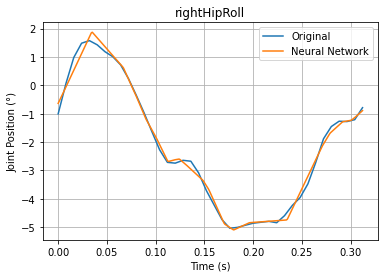

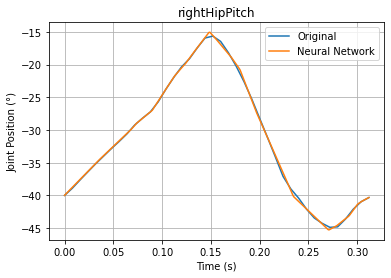

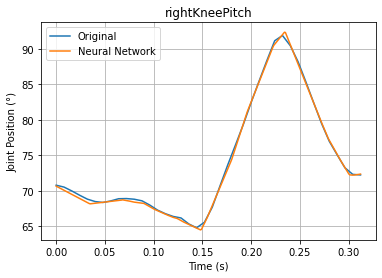

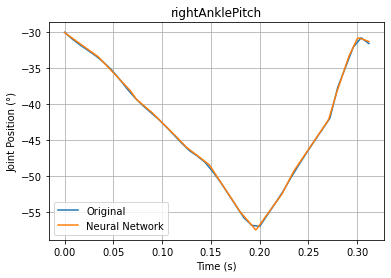

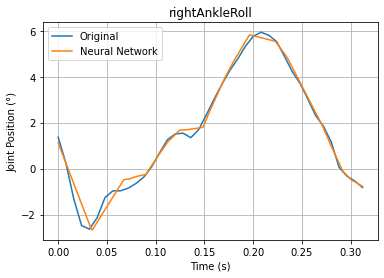

In [46]:
# Comparing original and copied joint trajectories to evaluate the imitation learning
for joint in right_leg_joints:
    plt.figure()
    plt.plot(input, expected_output[:, joints_dict[joint]] * 180.0 / pi)
    plt.plot(input_predict, output[:, joints_dict[joint]] * 180.0 / pi)
    plt.grid()
    plt.title(joint)
    plt.xlabel('Time (s)')
    plt.ylabel('Joint Position (°)')
    plt.legend(['Original', 'Neural Network'])
    plt.savefig('results/' + joint + '.' + fig_format, format=fig_format)
plt.show()

# 5. Entrega

A entrega consiste do notebook no formato **.ipynb** e de um relatório, submetida através do Google Classroom. Modificações nos arquivos do código base são permitidas, desde que o nome e a interface dos scripts “main” não sejam alterados. A princípio, não há limitação de número de páginas para o relatório, mas pede-se que seja sucinto. O relatório deve conter:

- Breve descrição em alto nível da sua implementação.
- Figuras que comprovem o funcionamento do seu código.

Por limitações do Google Classroom (e por motivo de facilitar a automatização da correção), entregue seu laboratório com todos os arquivos num único arquivo **.zip** (**não** utilize outras tecnologias de compactação de arquivos) com o seguinte padrão de nome: **“<login_email_google_education>_labX.zip”**. Por exemplo, no meu caso, meu login Google Education é **marcos.maximo**, logo eu entregaria o lab 7 como **“marcos.maximo_lab7.zip”**. **Não** crie subpastas para os arquivos da sua entrega, **deixe todos os arquivos na “raiz” do .zip**. Os relatórios devem ser entregues em formato **.pdf**.

# 6. Dicas

- Em ``keras.activations``, não há função de ativação *Leaky ReLU*. Para usar *Leaky* ReLU no Keras, você tem que adicionar uma camada do tipo *LeakyRelu* após ter definido uma camada (usando função de ativação linear). Assim, uma camada com função de ativação Leaky ReLU é definida em Keras da seguinte forma:
```python
model.add(layers.Dense(num_neurons, activation=activations.linear))
model.add(layers.LeakyReLU(alpha)) # alpha is the Leaky ReLU parameter
```

- Conforme está mostrado no exemplo, na primeira camada da rede, é importante definir qual é a dimensão da entrada.

- Para usar otimizar os parâmetros da rede usando Adam e função de custo quadrática, faça:
```python
model.compile(optimizer=optimizers.Adam(), loss=losses.mean_squared_error)
```

- Para usar todos os dados de treinamento durante o treinamento da rede, coloque o tamanho do *batch* igual ao tamanho do *dataset*.

- Para fazer o download das figuras e usá-las no relatório, use os seguintes comandos:
```python
from google.colab import files
import os
os.system('zip -r lab7_results.zip results')
files.download("lab7_results.zip")
```